# Business Case: LoanTap Logistic Regression


## Define Problem Statement and perform Exploratory Data Analysis

#### Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
If so, what should the repayment terms be in business recommendations?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mticker
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import scipy.stats as stats


In [2]:
data = pd.read_csv('logistic_regression.csv')

In [3]:
data.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [4]:
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [5]:
data.shape

(396030, 27)

There are total 27 Features and 396030 records for a given data set

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

From the above info we can see there are null values for emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies features

In [7]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [8]:
data.describe().round(3).T

count       mean        std     min       25%  \
loan_amnt             396030.0  14113.888   8357.441  500.00   8000.00   
int_rate              396030.0     13.639      4.472    5.32     10.49   
installment           396030.0    431.850    250.728   16.08    250.33   
annual_inc            396030.0  74203.176  61637.621    0.00  45000.00   
dti                   396030.0     17.380     18.019    0.00     11.28   
open_acc              396030.0     11.311      5.138    0.00      8.00   
pub_rec               396030.0      0.178      0.531    0.00      0.00   
revol_bal             396030.0  15844.540  20591.836    0.00   6025.00   
revol_util            395754.0     53.792     24.452    0.00     35.80   
total_acc             396030.0     25.415     11.887    2.00     17.00   
mort_acc              358235.0      1.814      2.148    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.122      0.356    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [9]:
data.describe(include = 'all').T

count  unique                          top    freq  \
loan_amnt             396030.0     NaN                          NaN     NaN   
term                    396030       2                    36 months  302005   
int_rate              396030.0     NaN                          NaN     NaN   
installment           396030.0     NaN                          NaN     NaN   
grade                   396030       7                            B  116018   
sub_grade               396030      35                           B3   26655   
emp_title               373103  173105                      Teacher    4389   
emp_length              377729      11                    10+ years  126041   
home_ownership          396030       6                     MORTGAGE  198348   
annual_inc            396030.0     NaN                          NaN     NaN   
verification_status     396030       3                     Verified  139563   
issue_d                 396030     115                     Oct-2014   14846   
loan_status             396030       2                   Fully Paid  318357   
purpose                 396030      14           debt_consolidation  234507   
title                   394275   48817           Debt consolidation  152472   
dti                   396030.0     NaN                          NaN     NaN   
earliest_cr_line        396030     684                     Oct-2000    3017   
open_acc              396030.0     NaN                          NaN     NaN   
pub_rec               396030.0     NaN                          NaN     NaN   
revol_bal             396030.0     NaN                          NaN     NaN   
revol_util            395754.0     NaN                          NaN     NaN   
total_acc             396030.0     NaN                          NaN     NaN   
initial_list_status     396030       2                            f  238066   
application_type        396030       3                   INDIVIDUAL  395319   
mort_acc              358235.0     NaN                          NaN     NaN   
pub_rec_bankruptcies  395495.0     NaN                          NaN     NaN   
address                 396030  393700  USCGC Smith\r\nFPO AE 70466       8   

                              mean           std    min      25%      50%  \
loan_amnt             14113.888089   8357.441341  500.0   8000.0  12000.0   
term                           NaN           NaN    NaN      NaN      NaN   
int_rate                   13.6394      4.472157   5.32    10.49    13.33   
installment             431.849698     250.72779  16.08   250.33   375.43   
grade                          NaN           NaN    NaN      NaN      NaN   
sub_grade                      NaN           NaN    NaN      NaN      NaN   
emp_title                      NaN           NaN    NaN      NaN      NaN   
emp_length                     NaN           NaN    NaN      NaN      NaN   
home_ownership                 NaN           NaN    NaN      NaN      NaN   
annual_inc            74203.175798  61637.621158    0.0  45000.0  64000.0   
verification_status            NaN           NaN    NaN      NaN      NaN   
issue_d                        NaN           NaN    NaN      NaN      NaN   
loan_status                    NaN           NaN    NaN      NaN      NaN   
purpose                        NaN           NaN    NaN      NaN      NaN   
title                          NaN           NaN    NaN      NaN      NaN   
dti                      17.379514     18.019092    0.0    11.28    16.91   
earliest_cr_line               NaN           NaN    NaN      NaN      NaN   
open_acc                 11.311153      5.137649    0.0      8.0     10.0   
pub_rec                   0.178191      0.530671    0.0      0.0      0.0   
revol_bal             15844.539853  20591.836109    0.0   6025.0  11181.0   
revol_util               53.791749     24.452193    0.0     35.8     54.8   
total_acc                25.414744     11.886991    2.0     17.0     24.0   
initial_list_status            NaN       

In [10]:
data.describe(include=[np.object]).T

C:\Users\shwet\AppData\Local\Temp\ipykernel_34340\9414863.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]).T


count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394275   48817           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [13]:
data.pub_rec_bankruptcies.value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
toCategory = ['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 'verification_status','loan_status','initial_list_status','application_type','pub_rec_bankruptcies']
for x in toCategory:
    data[x] = data[x].astype('category')

In [15]:
duplicate = data[data.duplicated(keep = 'last')]
duplicate

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []

[0 rows x 27 columns]

In [16]:
for x in toCategory:
    print('\033[1m' + "Unique values for Feature " + x  + '\033[0m')
    print("Number of Unique values: " + str(data[x].nunique()))
    print(data[x].unique())
    print()
    print('\033[1m' + "Value Counts for Feature " + x  + '\033[0m')
    print(data[x].value_counts())
    print()
    print('\033[1m' + "Normalized Value Counts for Feature " + x  + '\033[0m')
    print(data[x].value_counts(normalize=True).round(2))
    print()
    print('\033[1m' + "-------------------------------------------------------------------------------------------" + '\033[0m')
    print()

Unique values for Feature term
Number of Unique values: 2
[' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

Value Counts for Feature term
 36 months    302005
 60 months     94025
Name: term, dtype: int64

Normalized Value Counts for Feature term
 36 months    0.76
 60 months    0.24
Name: term, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for Feature grade
Number of Unique values: 7
['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Value Counts for Feature grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

Normalized Value Counts for Feature grade
B    0.29
C    0.27
A    0.16
D    0.16
E    0.08
F    0.03
G    0.01
Name: grade, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for Feature sub

C:\Users\shwet\AppData\Local\Temp\ipykernel_34340\3117054419.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(data[x].unique())


In [17]:
loan_Status = pd.DataFrame(data['loan_status'].value_counts(normalize=True) * 100)
loan_Status.reset_index(inplace = True)
loan_Status.columns = ['loan_status', 'percentage']
loan_Status

loan_status  percentage
0   Fully Paid   80.387092
1  Charged Off   19.612908

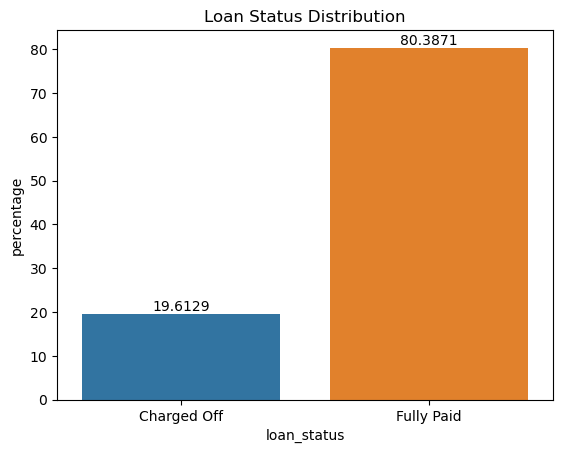

In [18]:
graph = sns.barplot(x = loan_Status['loan_status'], y = loan_Status['percentage'])
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Loan Status Distribution")
plt.show()

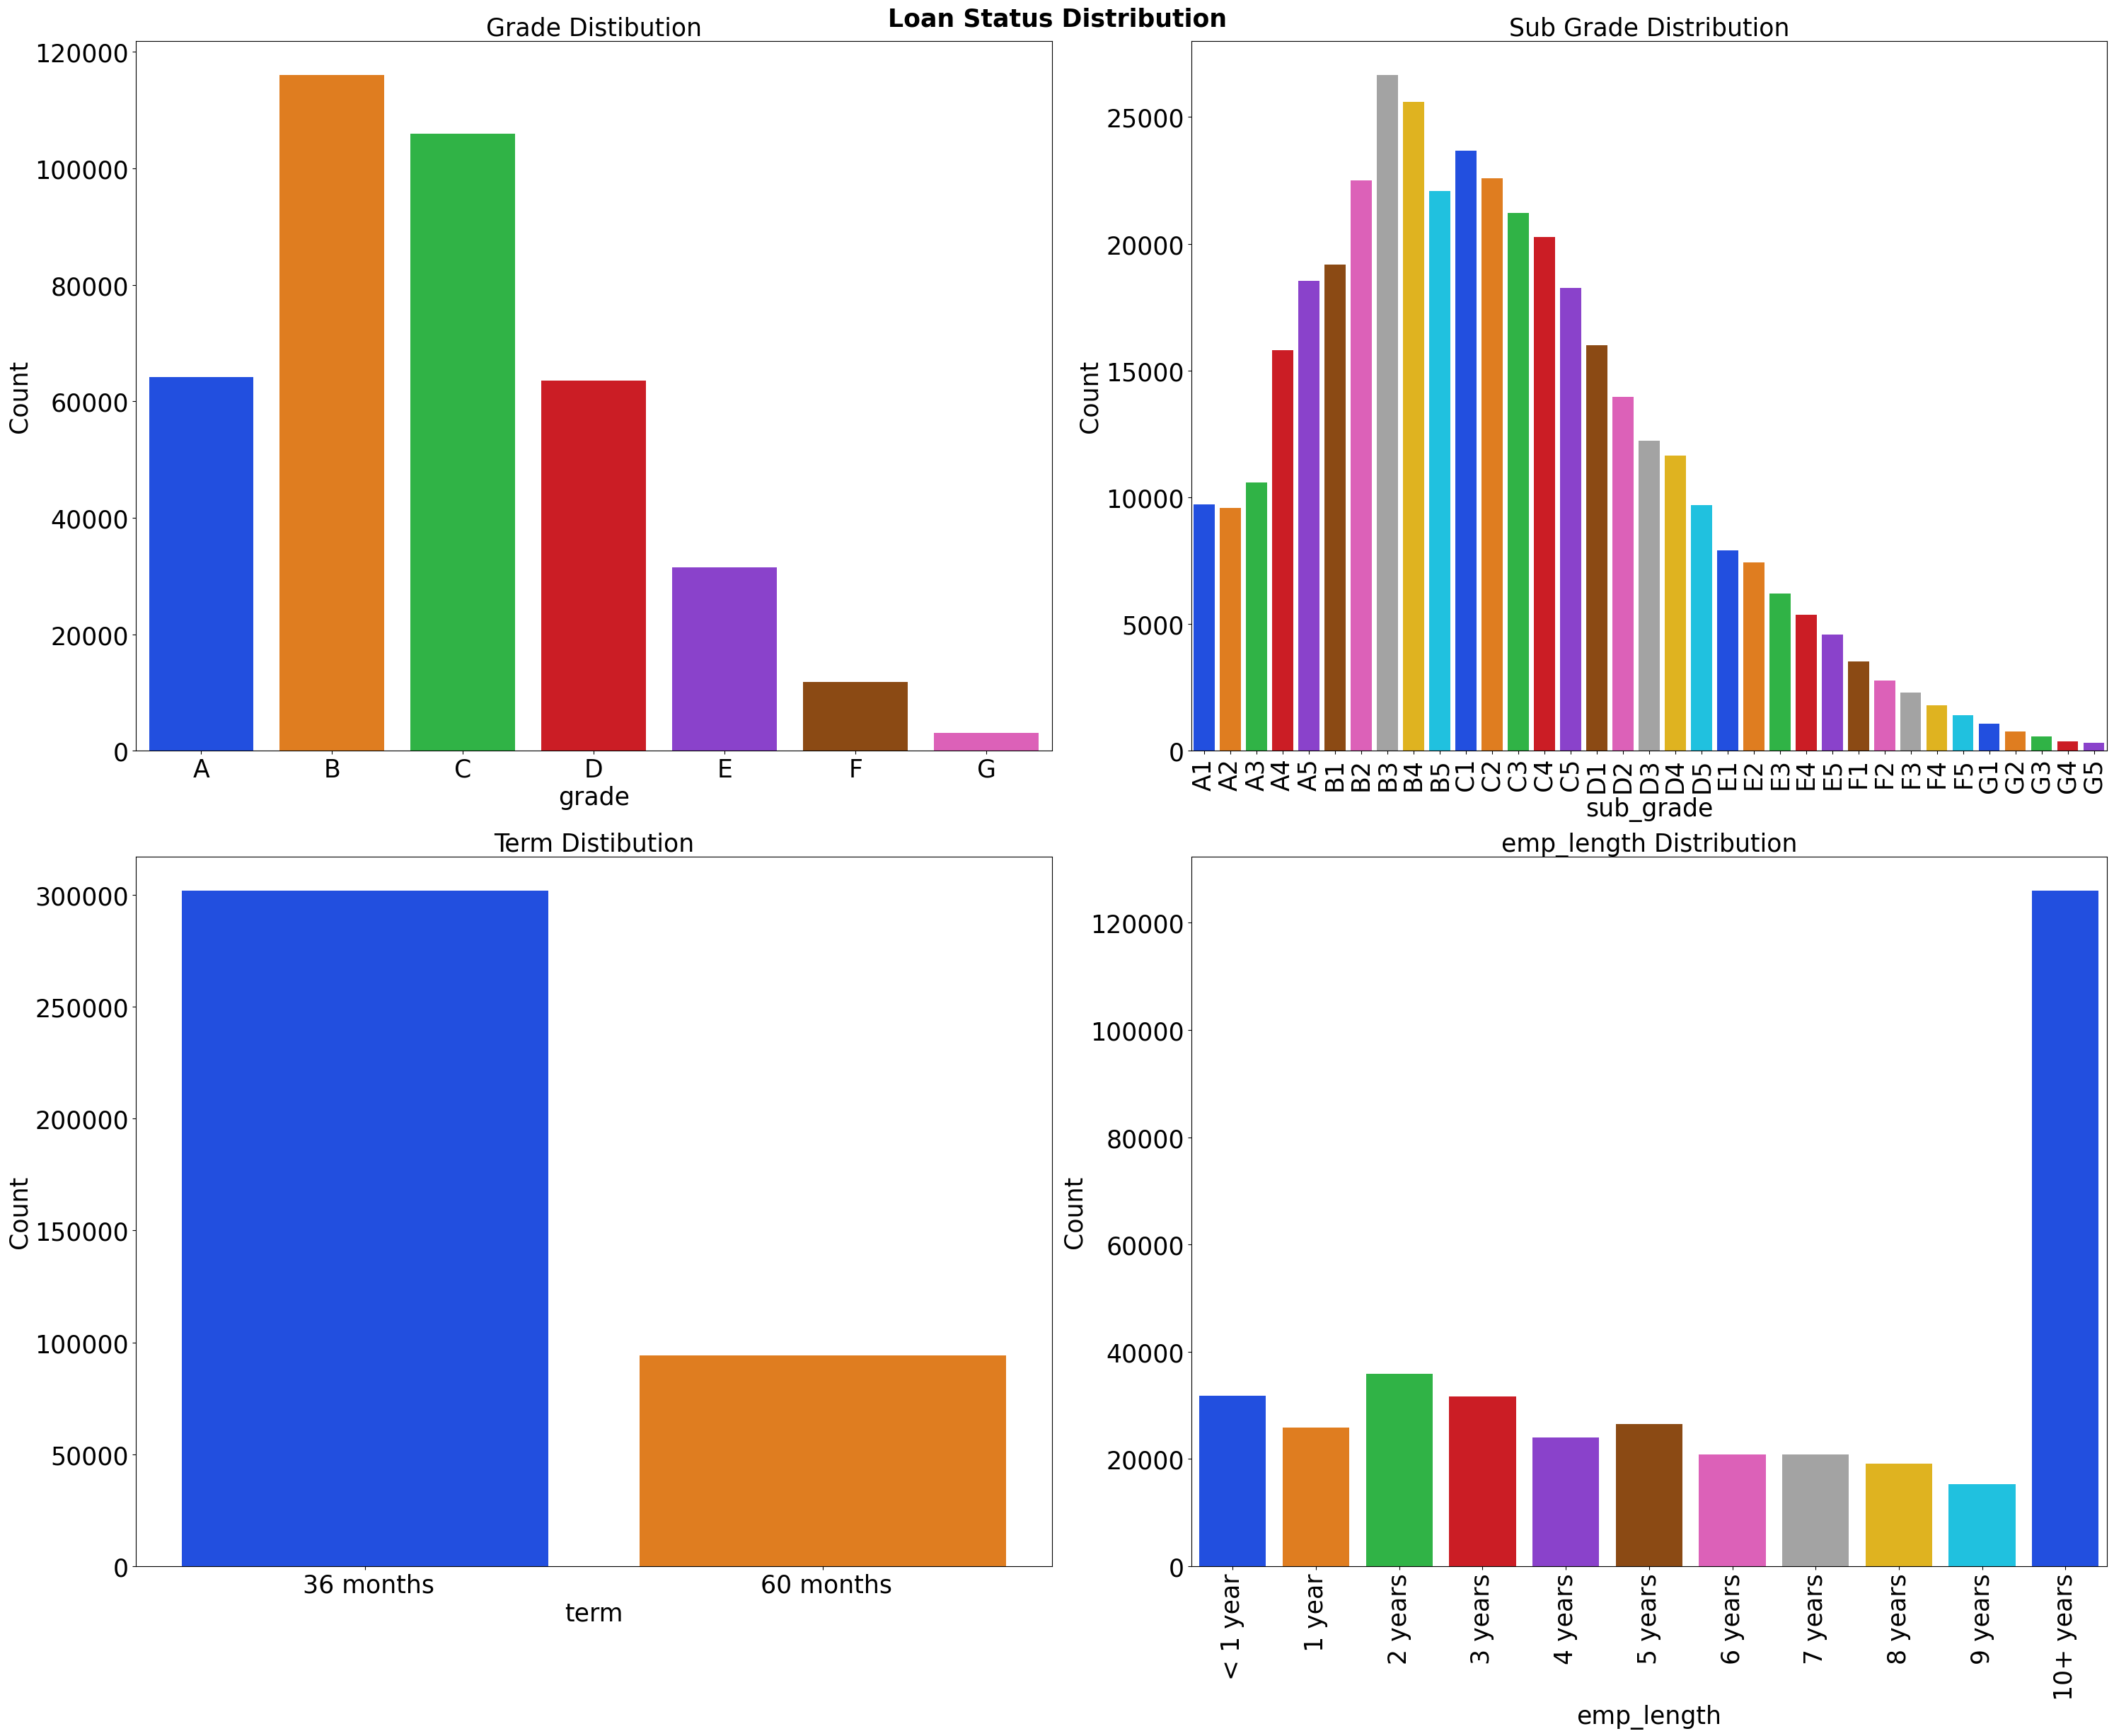

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(30, 25), sharey=False)
fig.suptitle("Loan Status Distribution" , fontsize=25, fontweight='bold')
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
graph = sns.countplot(x = 'grade', data= data, ax = axs[0][0],palette='bright', order = grade)
graph.set_title("Grade Distibution", fontsize = 25)
graph.set_xlabel('grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)


sub_grade = sorted(data.sub_grade.unique().tolist())
graph = sns.countplot(x = 'sub_grade', data = data, ax = axs[0][1], palette='bright', order = sub_grade)
graph.set_title("Sub Grade Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('sub_grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'term', data= data, ax = axs[1][0],palette='bright')
graph.set_title("Term Distibution", fontsize = 25)
graph.set_xlabel('term', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
graph = sns.countplot(x = 'emp_length', data = data, ax = axs[1][1], palette='bright', order = order)
graph.set_title("emp_length Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('emp_length', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

plt.tight_layout()
plt.show()

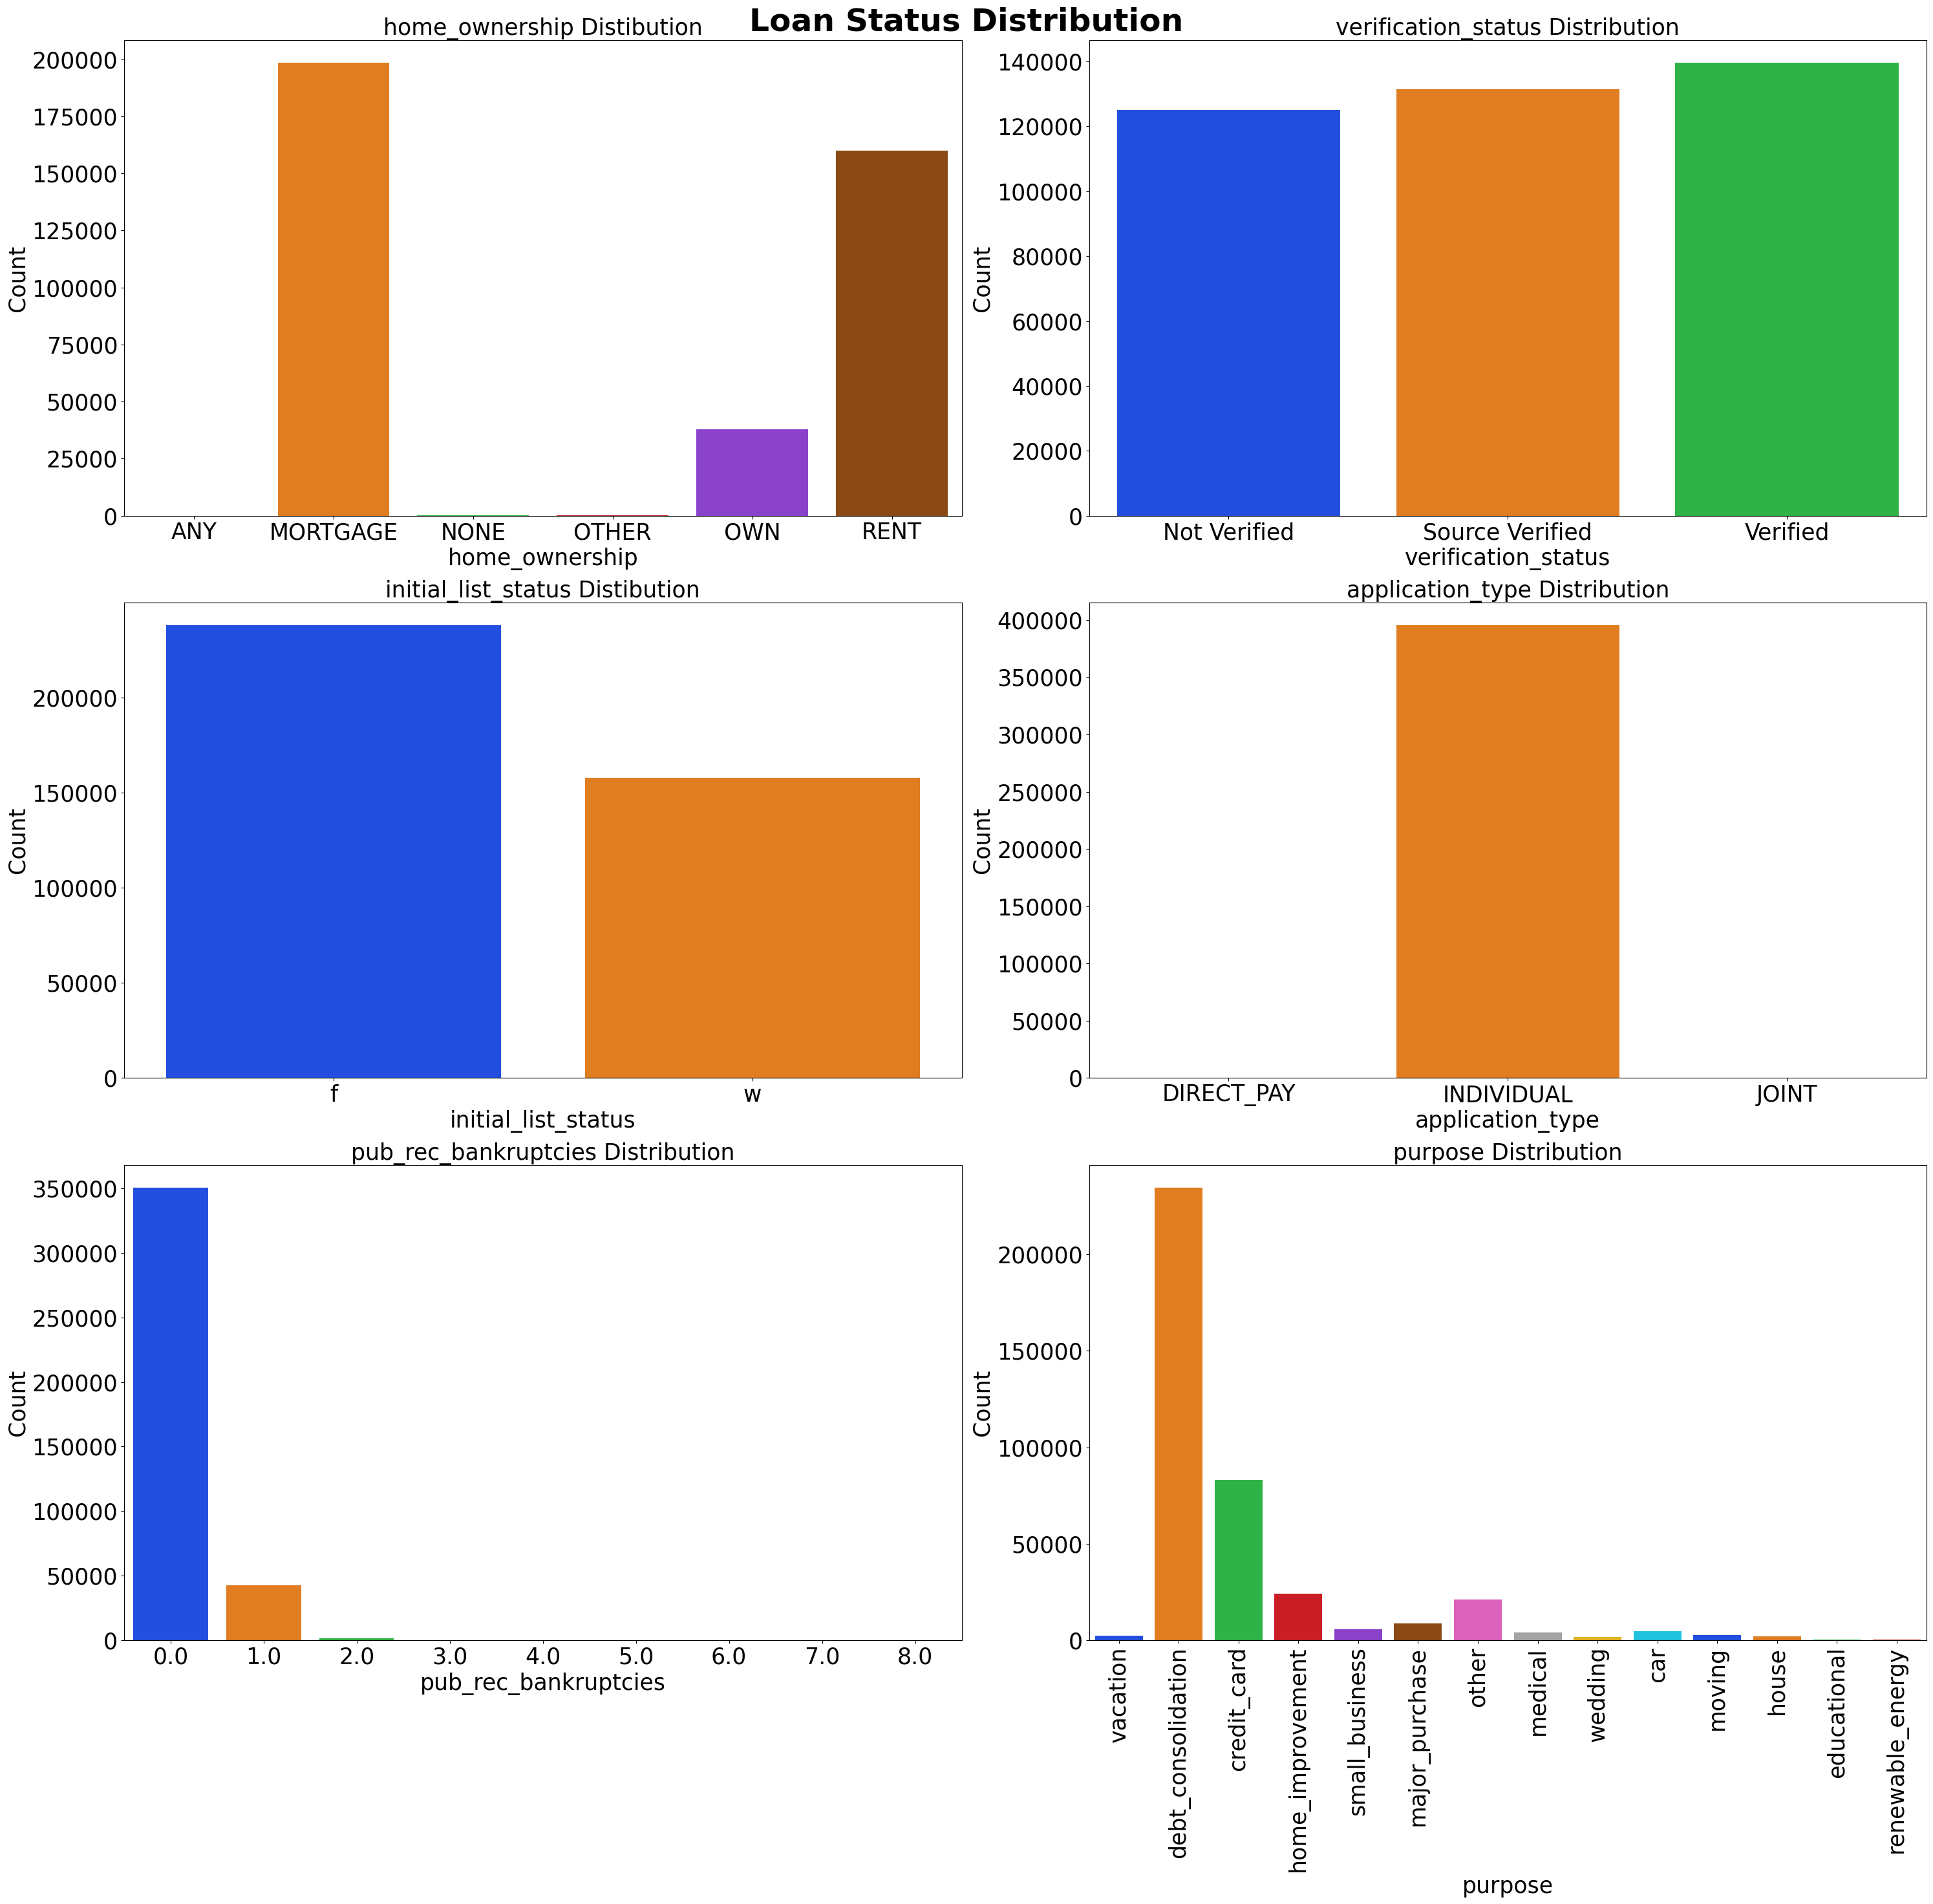

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)

fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', data= data, ax = axs[0][0],palette='bright')
graph.set_title("home_ownership Distibution", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'verification_status', data = data, ax = axs[0][1], palette='bright')
graph.set_title("verification_status Distribution", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)


graph = sns.countplot(x = 'initial_list_status', data= data, ax = axs[1][0],palette='bright')
graph.set_title("initial_list_status Distibution", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'application_type', data = data, ax = axs[1][1], palette='bright')
graph.set_title("application_type Distribution", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', data = data, ax = axs[2][0], palette='bright')
graph.set_title("pub_rec_bankruptcies Distribution", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'purpose', data = data, ax = axs[2][1], palette='bright')
graph.set_title("purpose Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.show()

In [21]:
def outlierAnalysis(x):
    Q3, Q1 = np.percentile(data[x], [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    mean = round(data[x].mean(),2)
    median = round(data[x].median(),2)
    mode = round(data[x].mode(), 2)
    print("For the given sample " +x +" Analysis is as Follows: ")
    print("Q1: ", Q1)
    print("Q3: ", Q3)
    print("Mean: ", round(data[x].mean(),2))
    print("Median: ", data[x].median())
    print("Mode: " , round(data[x].mode(), 2))
    print("IQR: " , IQR)
    print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier)
    print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)


In [22]:
def plotfor_continuousdata(x):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
    plt.suptitle(x+" Analysis", fontsize = 15)
    g1 = sns.histplot(data[x], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
    g1.axvline(data[x].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
    g1.axvline(data[x].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
    g1.axvline(data[x].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
    g1.legend()
    stats.probplot(data[x], dist="norm", plot=axs[0, 1])
    plt.tight_layout()
    plt.show()

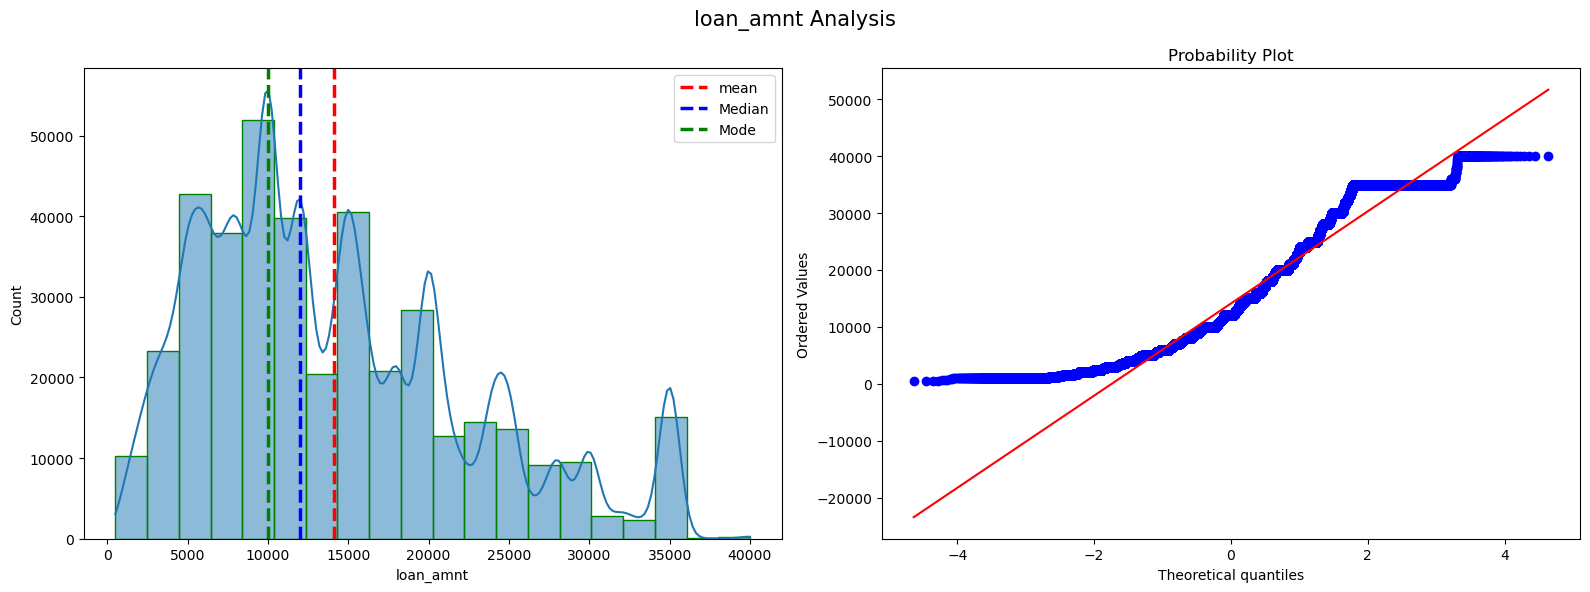

-------------------------------------------------------------------------------------------------------------------


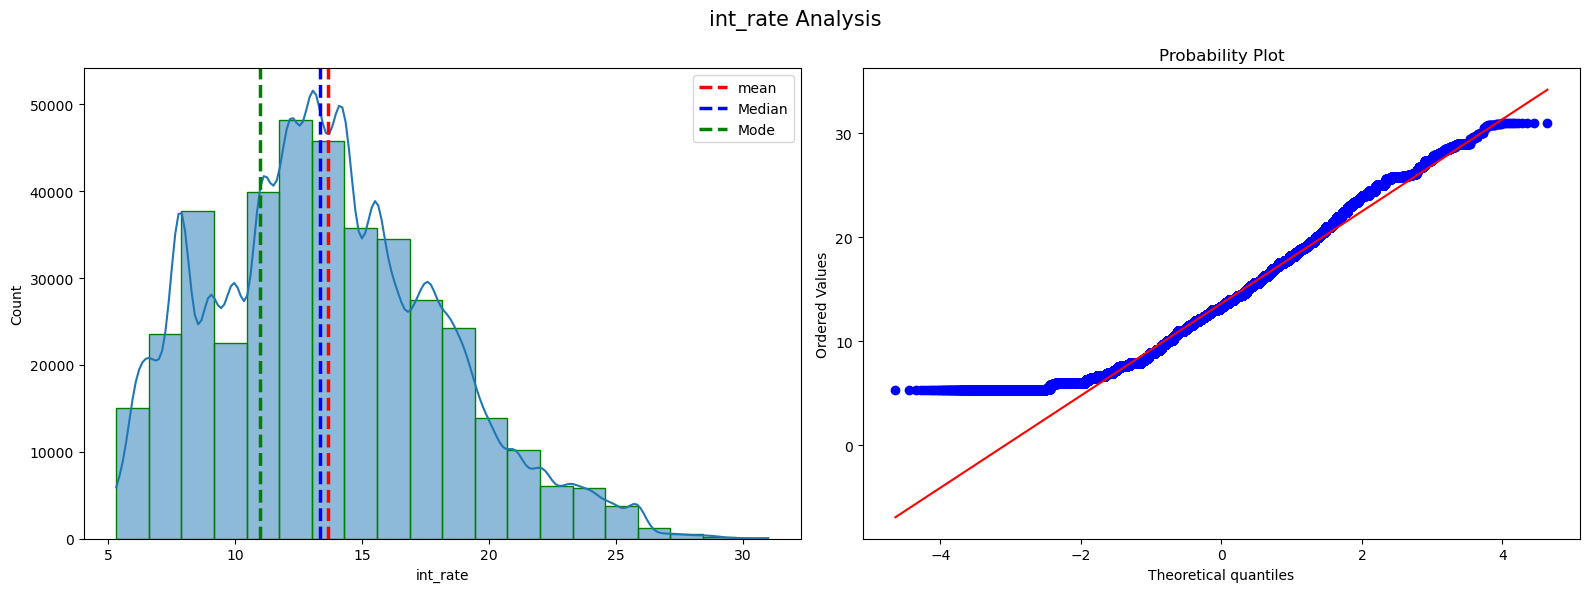

-------------------------------------------------------------------------------------------------------------------


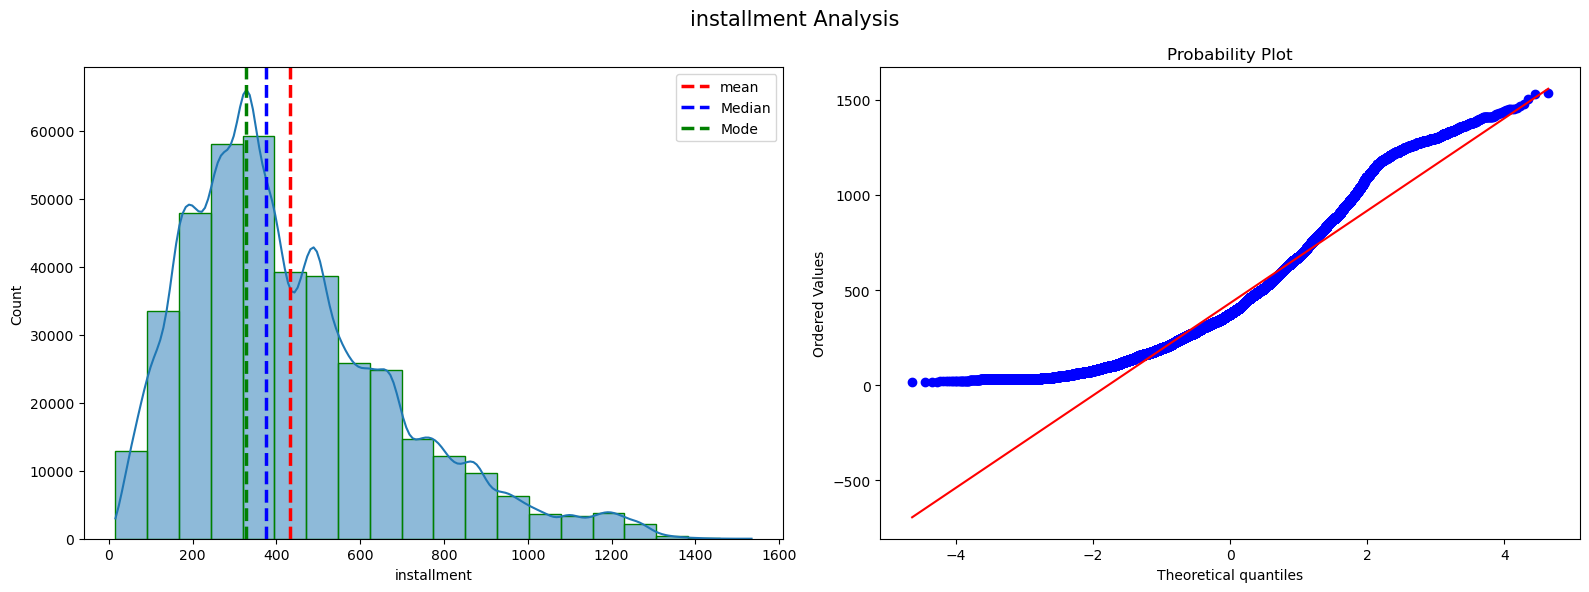

-------------------------------------------------------------------------------------------------------------------


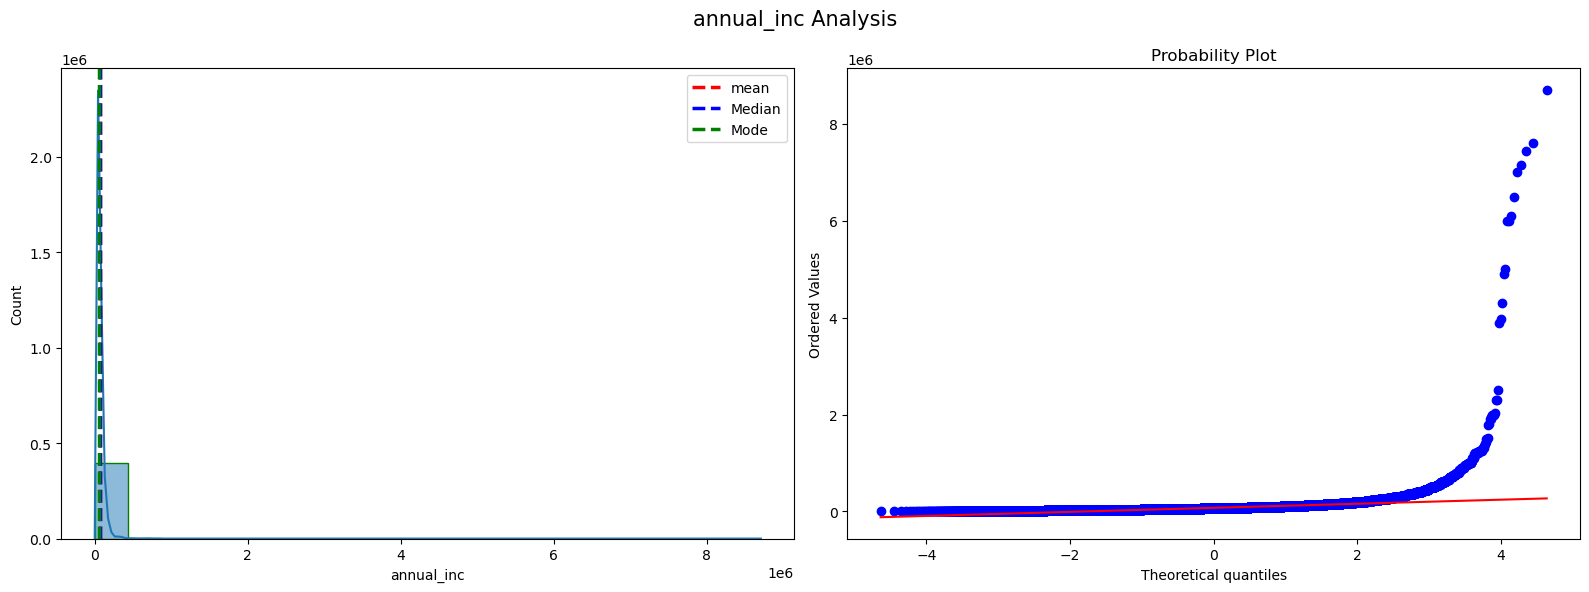

-------------------------------------------------------------------------------------------------------------------


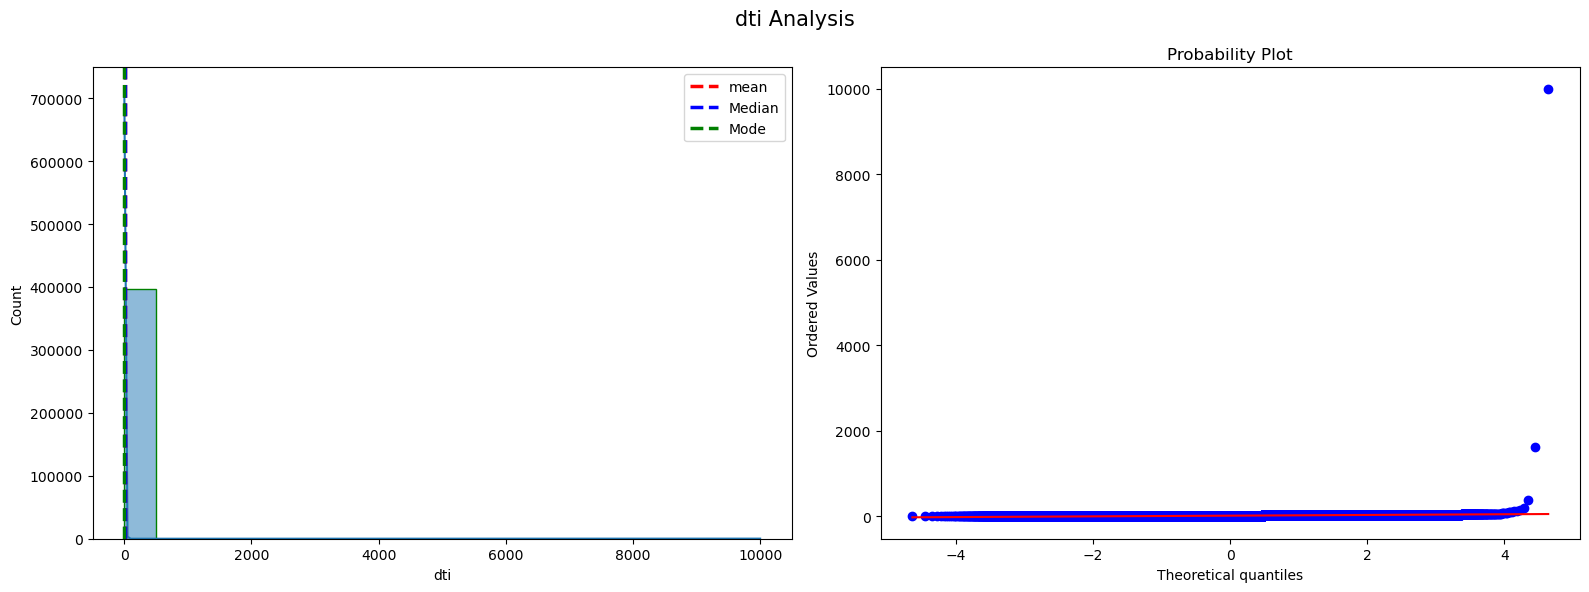

-------------------------------------------------------------------------------------------------------------------


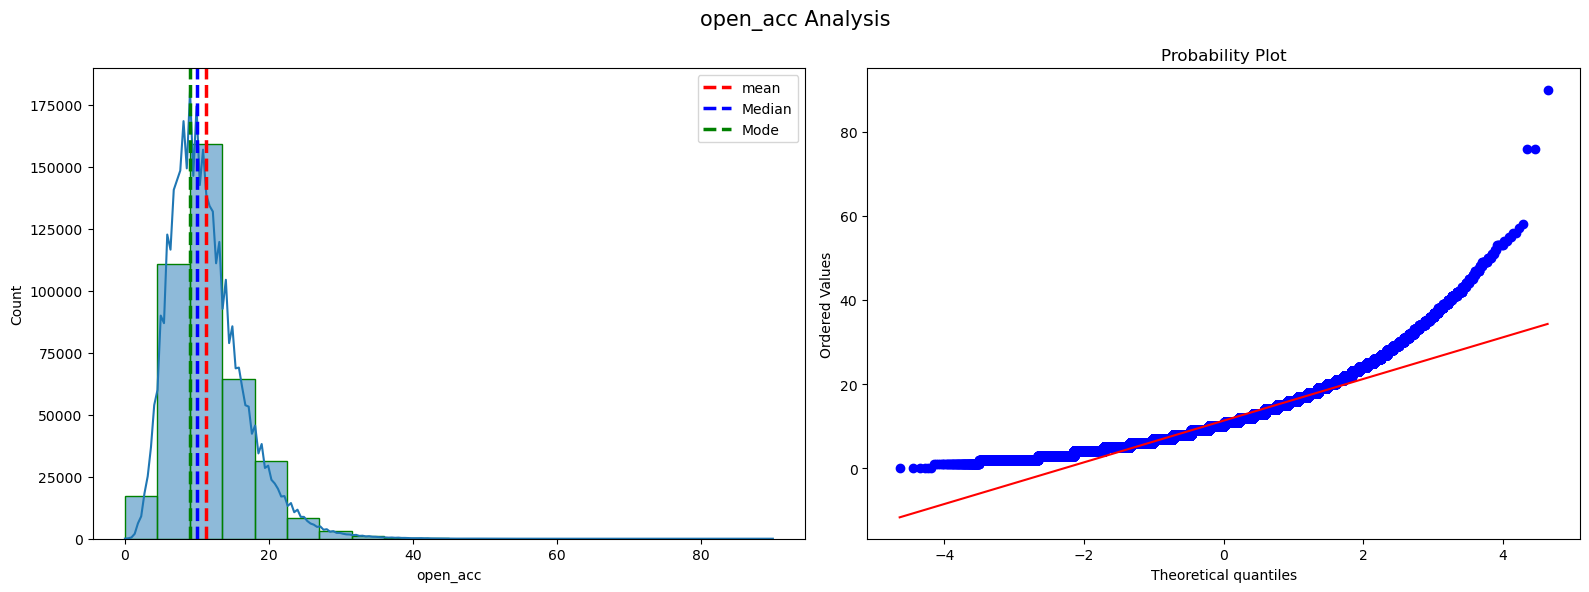

-------------------------------------------------------------------------------------------------------------------


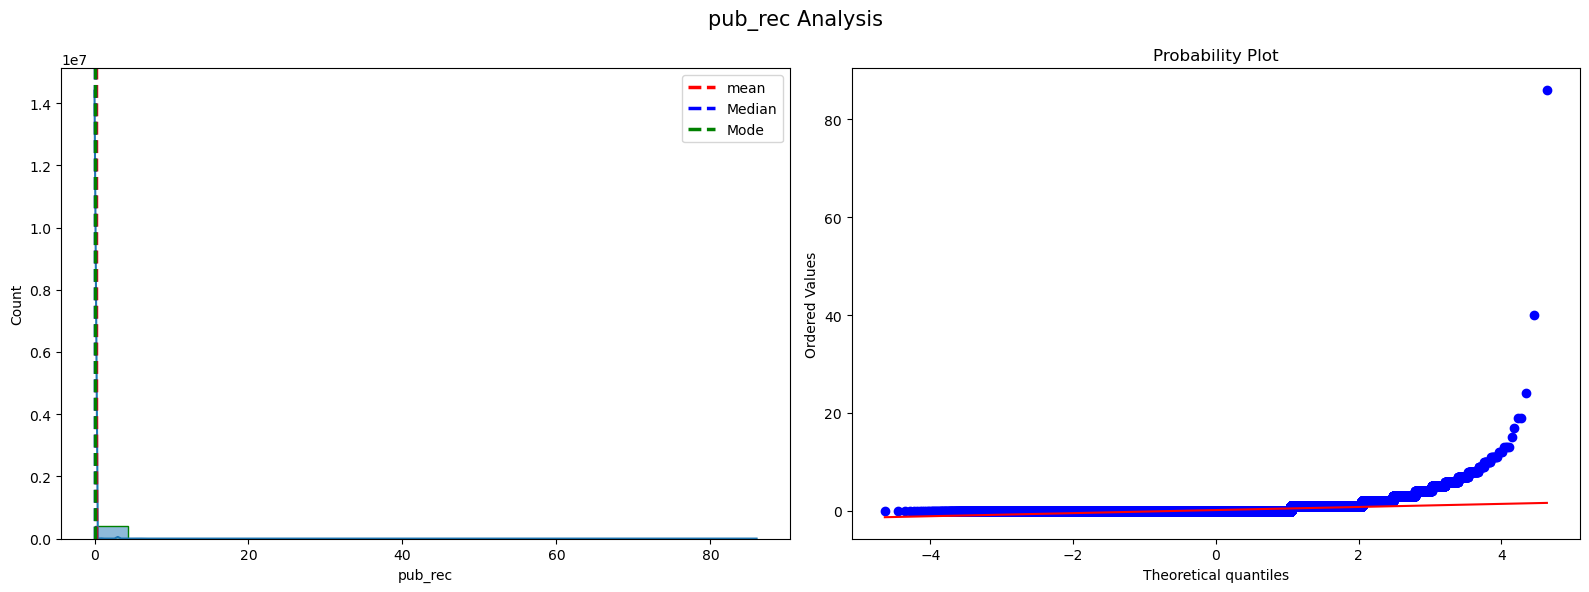

-------------------------------------------------------------------------------------------------------------------


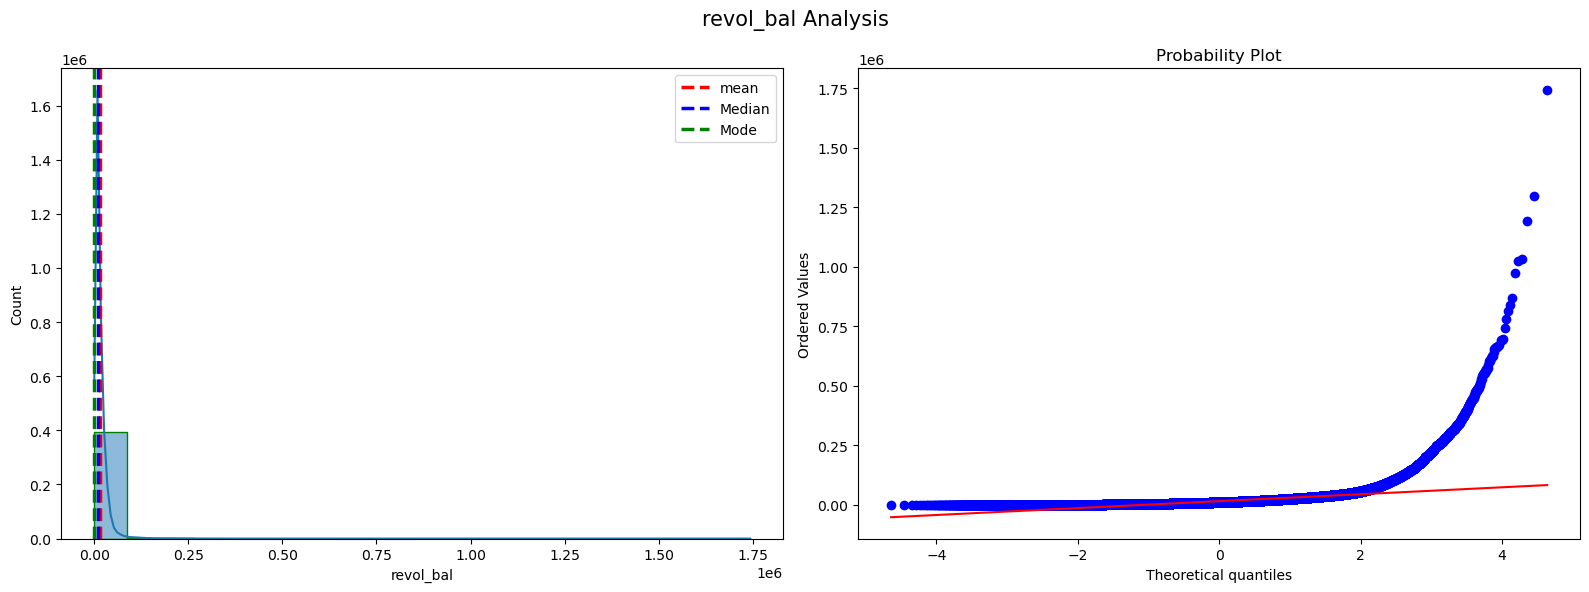

-------------------------------------------------------------------------------------------------------------------


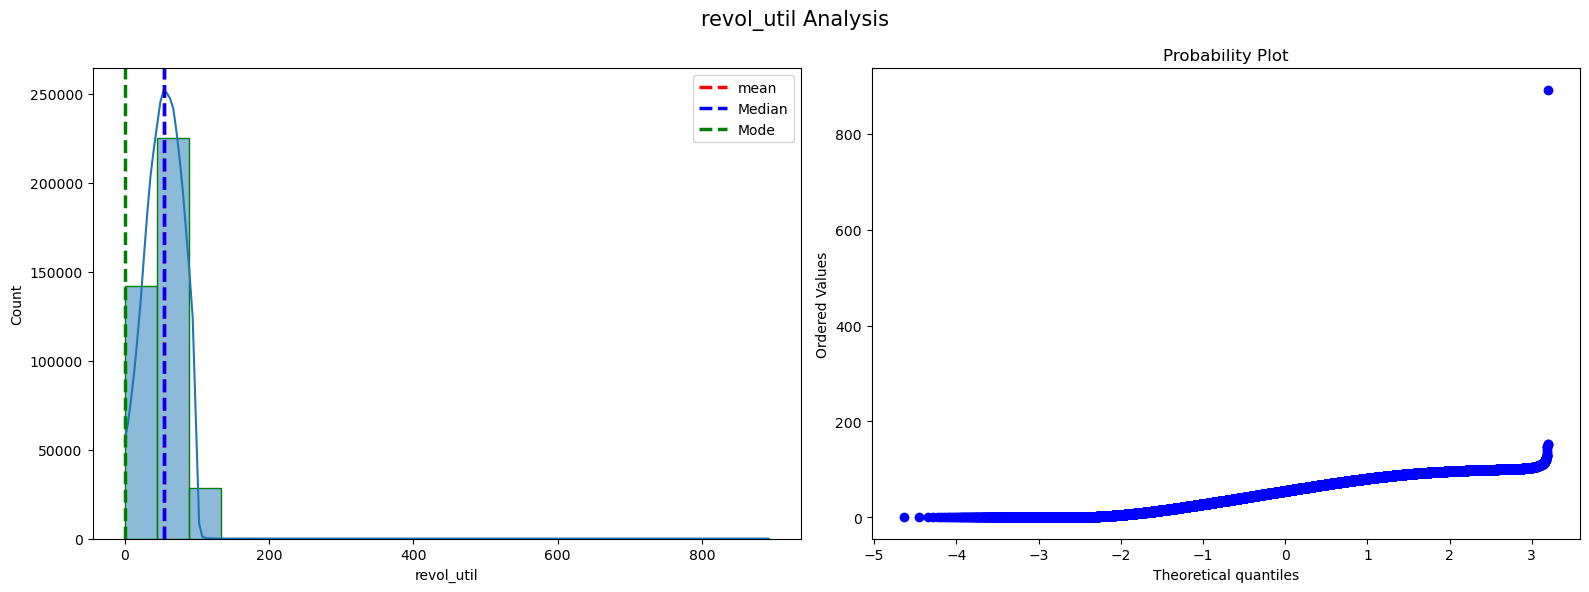

-------------------------------------------------------------------------------------------------------------------


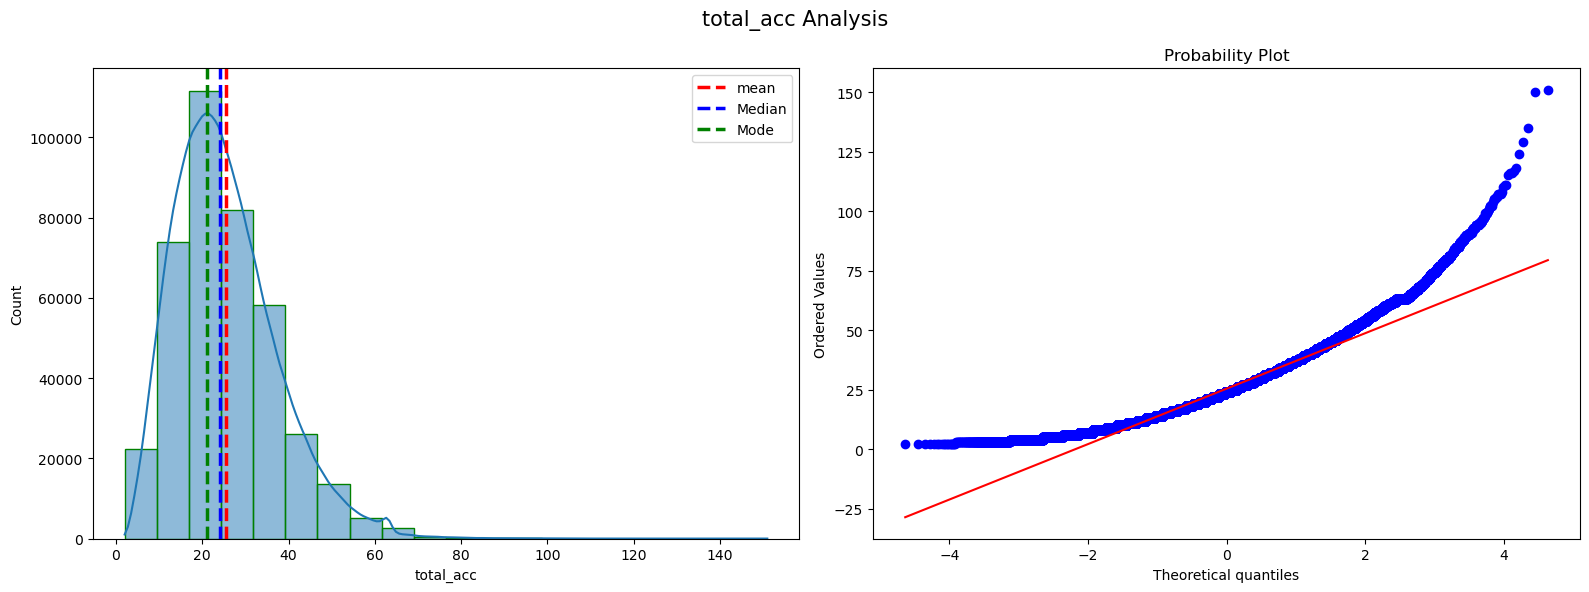

-------------------------------------------------------------------------------------------------------------------


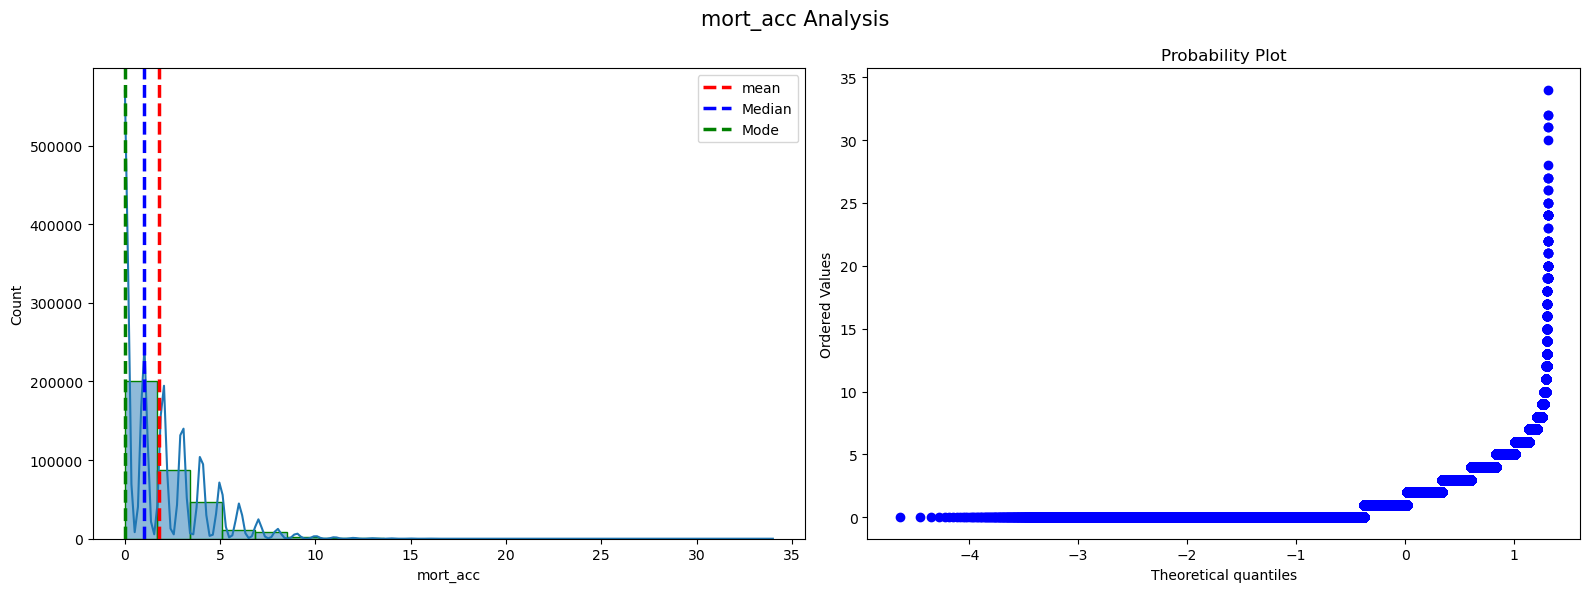

-------------------------------------------------------------------------------------------------------------------


In [23]:
num = data.select_dtypes(include='number')
for x in num:
    plotfor_continuousdata(x)
    print("-------------------------------------------------------------------------------------------------------------------")

In [24]:
for x in num:
    print("Statistical Info of ", x)
    print(data[x].describe())
    print("**************************************")
    print("Outlier Analysis for ", x)
    print(outlierAnalysis(x))
    print("######################################################################################################")
    print()

Statistical Info of  loan_amnt
count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
**************************************
Outlier Analysis for  loan_amnt
For the given sample loan_amnt Analysis is as Follows: 
Q1:  8000.0
Q3:  20000.0
Mean:  14113.89
Median:  12000.0
Mode:  0    10000.0
Name: loan_amnt, dtype: float64
IQR:  12000.0
Maximum loan_amnt Excluding Outlier:  38000.0
Minimum loan_amnt Purchase Excluding Outlier:  -10000.0
None
######################################################################################################

Statistical Info of  int_rate
count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64
**************************************
Outlier

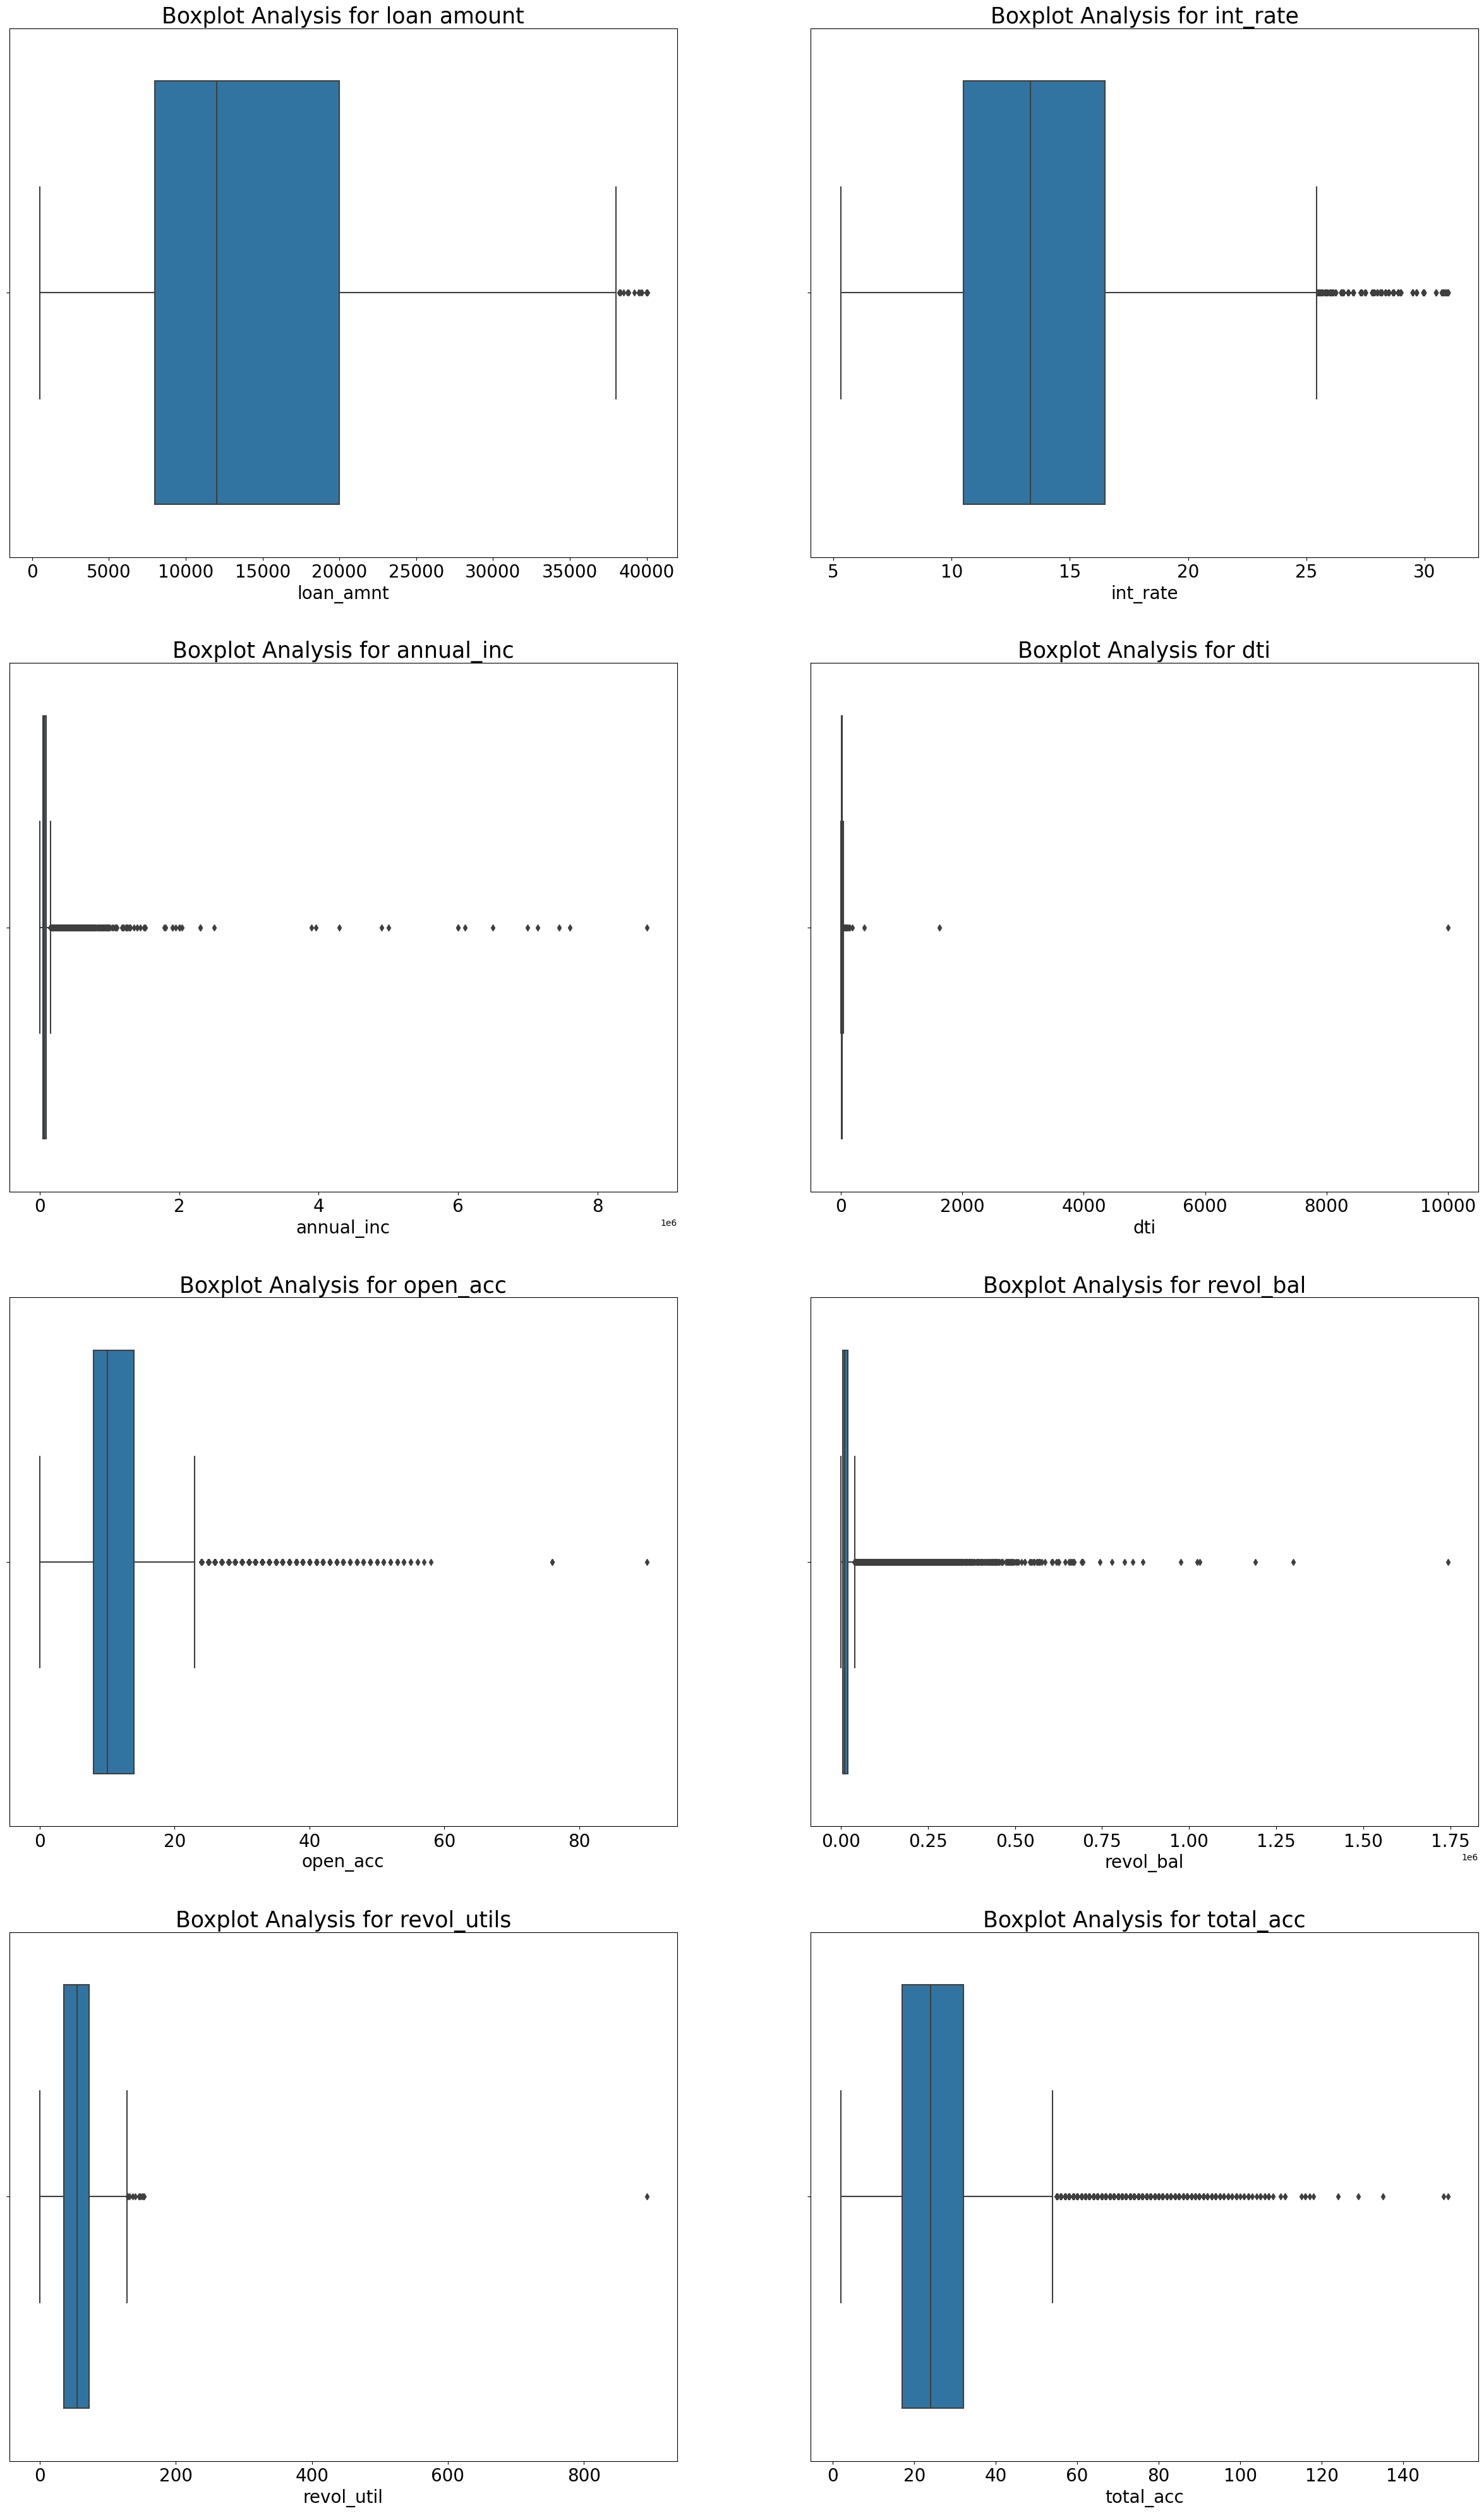

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= data,dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan amount" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= data, dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate" 
graph.set_xlabel('int_rate', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= data, dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis for annual_inc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= data, dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= data, dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= data, dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= data, dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_utils" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= data, dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

We can see most of the numerical data we have is right skewed so, outlier treatment will be must

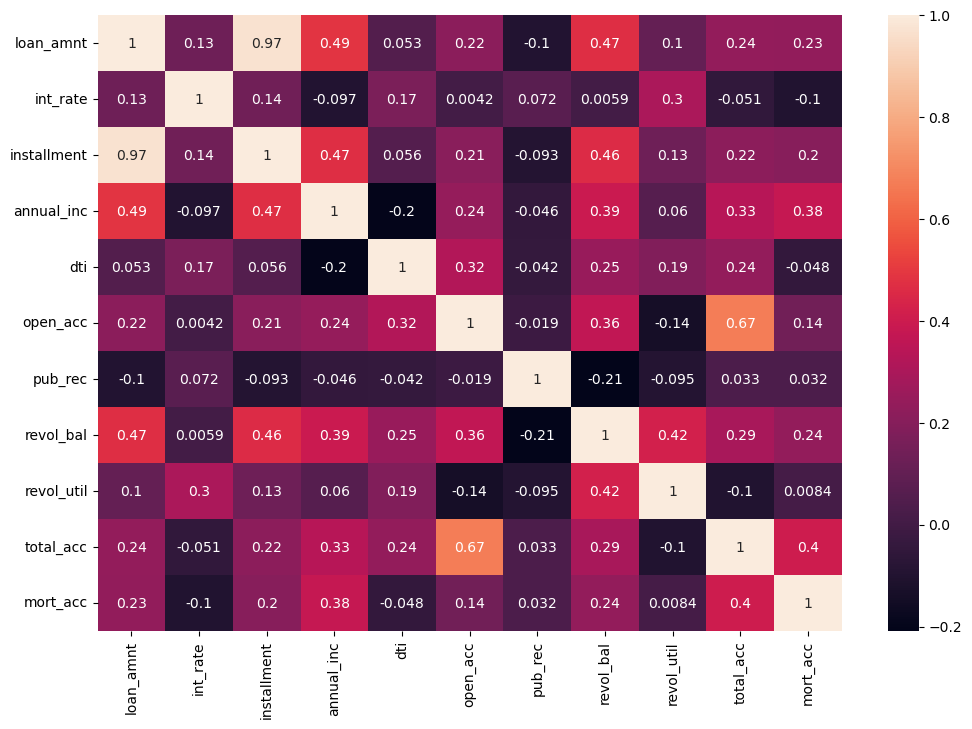

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

In [27]:
data.drop(columns=['installment'], axis=1, inplace=True)

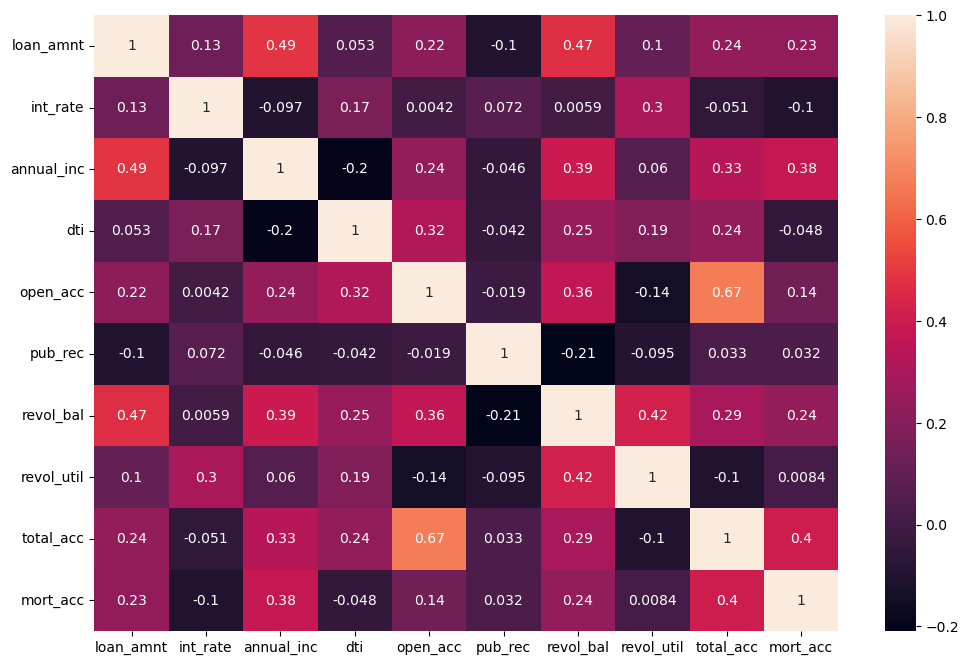

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

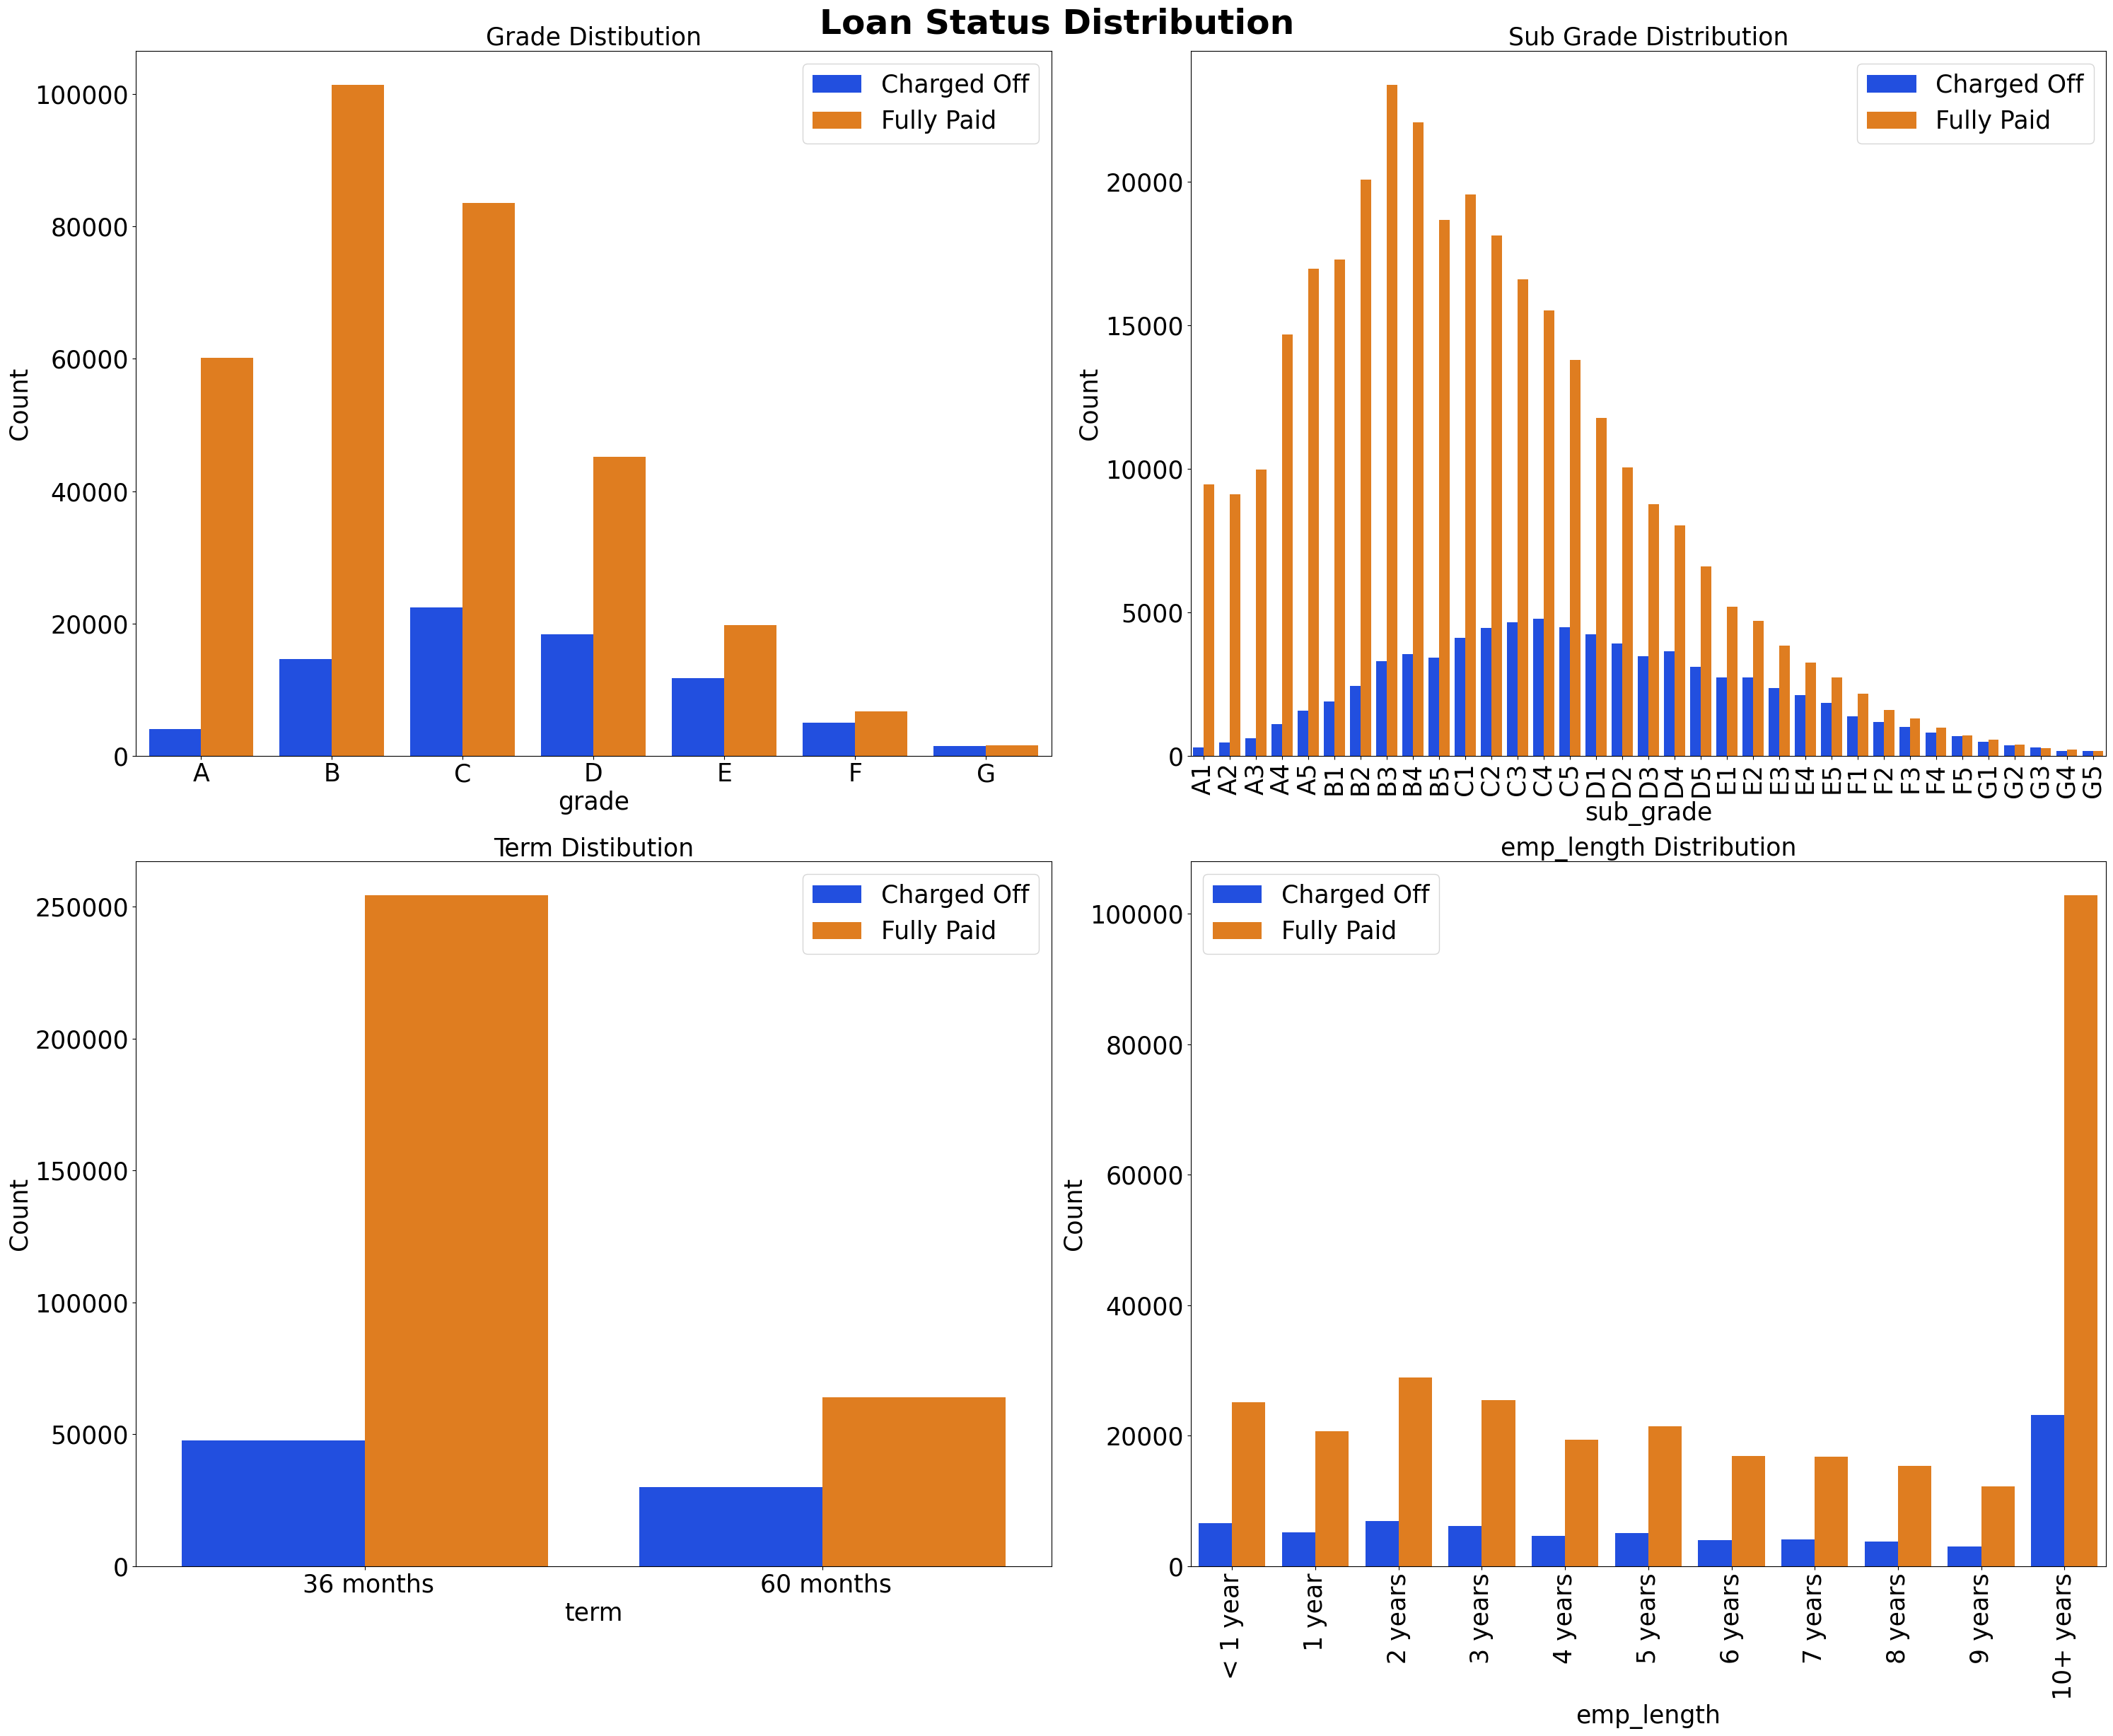

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(30, 25), sharey=False)
fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
graph = sns.countplot(x = 'grade', hue= 'loan_status', data= data, ax = axs[0][0],palette='bright', order = grade)
graph.set_title("Grade Distibution", fontsize = 25)
graph.set_xlabel('grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

sub_grade = sorted(data.sub_grade.unique().tolist())
graph = sns.countplot(x = 'sub_grade', hue = 'loan_status', data = data, ax = axs[0][1], palette='bright', order = sub_grade)
graph.set_title("Sub Grade Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('sub_grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'term', hue= 'loan_status', data= data, ax = axs[1][0],palette='bright')
graph.set_title("Term Distibution", fontsize = 25)
graph.set_xlabel('term', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
graph = sns.countplot(x = 'emp_length', hue = 'loan_status', data = data, ax = axs[1][1], palette='bright', order = order)
graph.set_title("emp_length Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('emp_length', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

In [30]:
table = pd.crosstab(data["grade"],data["loan_status"],normalize='index')
print('contingency_table :\n',table)

contingency_table :
 loan_status  Charged Off  Fully Paid
grade                               
A               0.062879    0.937121
B               0.125730    0.874270
C               0.211809    0.788191
D               0.288678    0.711322
E               0.373634    0.626366
F               0.427880    0.572120
G               0.478389    0.521611


In [31]:
table = pd.crosstab(data["sub_grade"],data["loan_status"],normalize='index')
print('contingency_table :\n',table)

contingency_table :
 loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.028677    0.971323
A2              0.048186    0.951814
A3              0.058056    0.941944
A4              0.070239    0.929761
A5              0.084908    0.915092
B1              0.098582    0.901418
B2              0.108513    0.891487
B3              0.123354    0.876646
B4              0.138393    0.861607
B5              0.155037    0.844963
C1              0.173696    0.826304
C2              0.197520    0.802480
C3              0.218416    0.781584
C4              0.235355    0.764645
C5              0.245067    0.754933
D1              0.263803    0.736197
D2              0.280338    0.719662
D3              0.284218    0.715782
D4              0.311315    0.688685
D5              0.320103    0.679897
E1              0.344070    0.655930
E2              0.367380    0.632620
E3              0.380377    0.619623
E4              0.393024    0.606976
E5              0

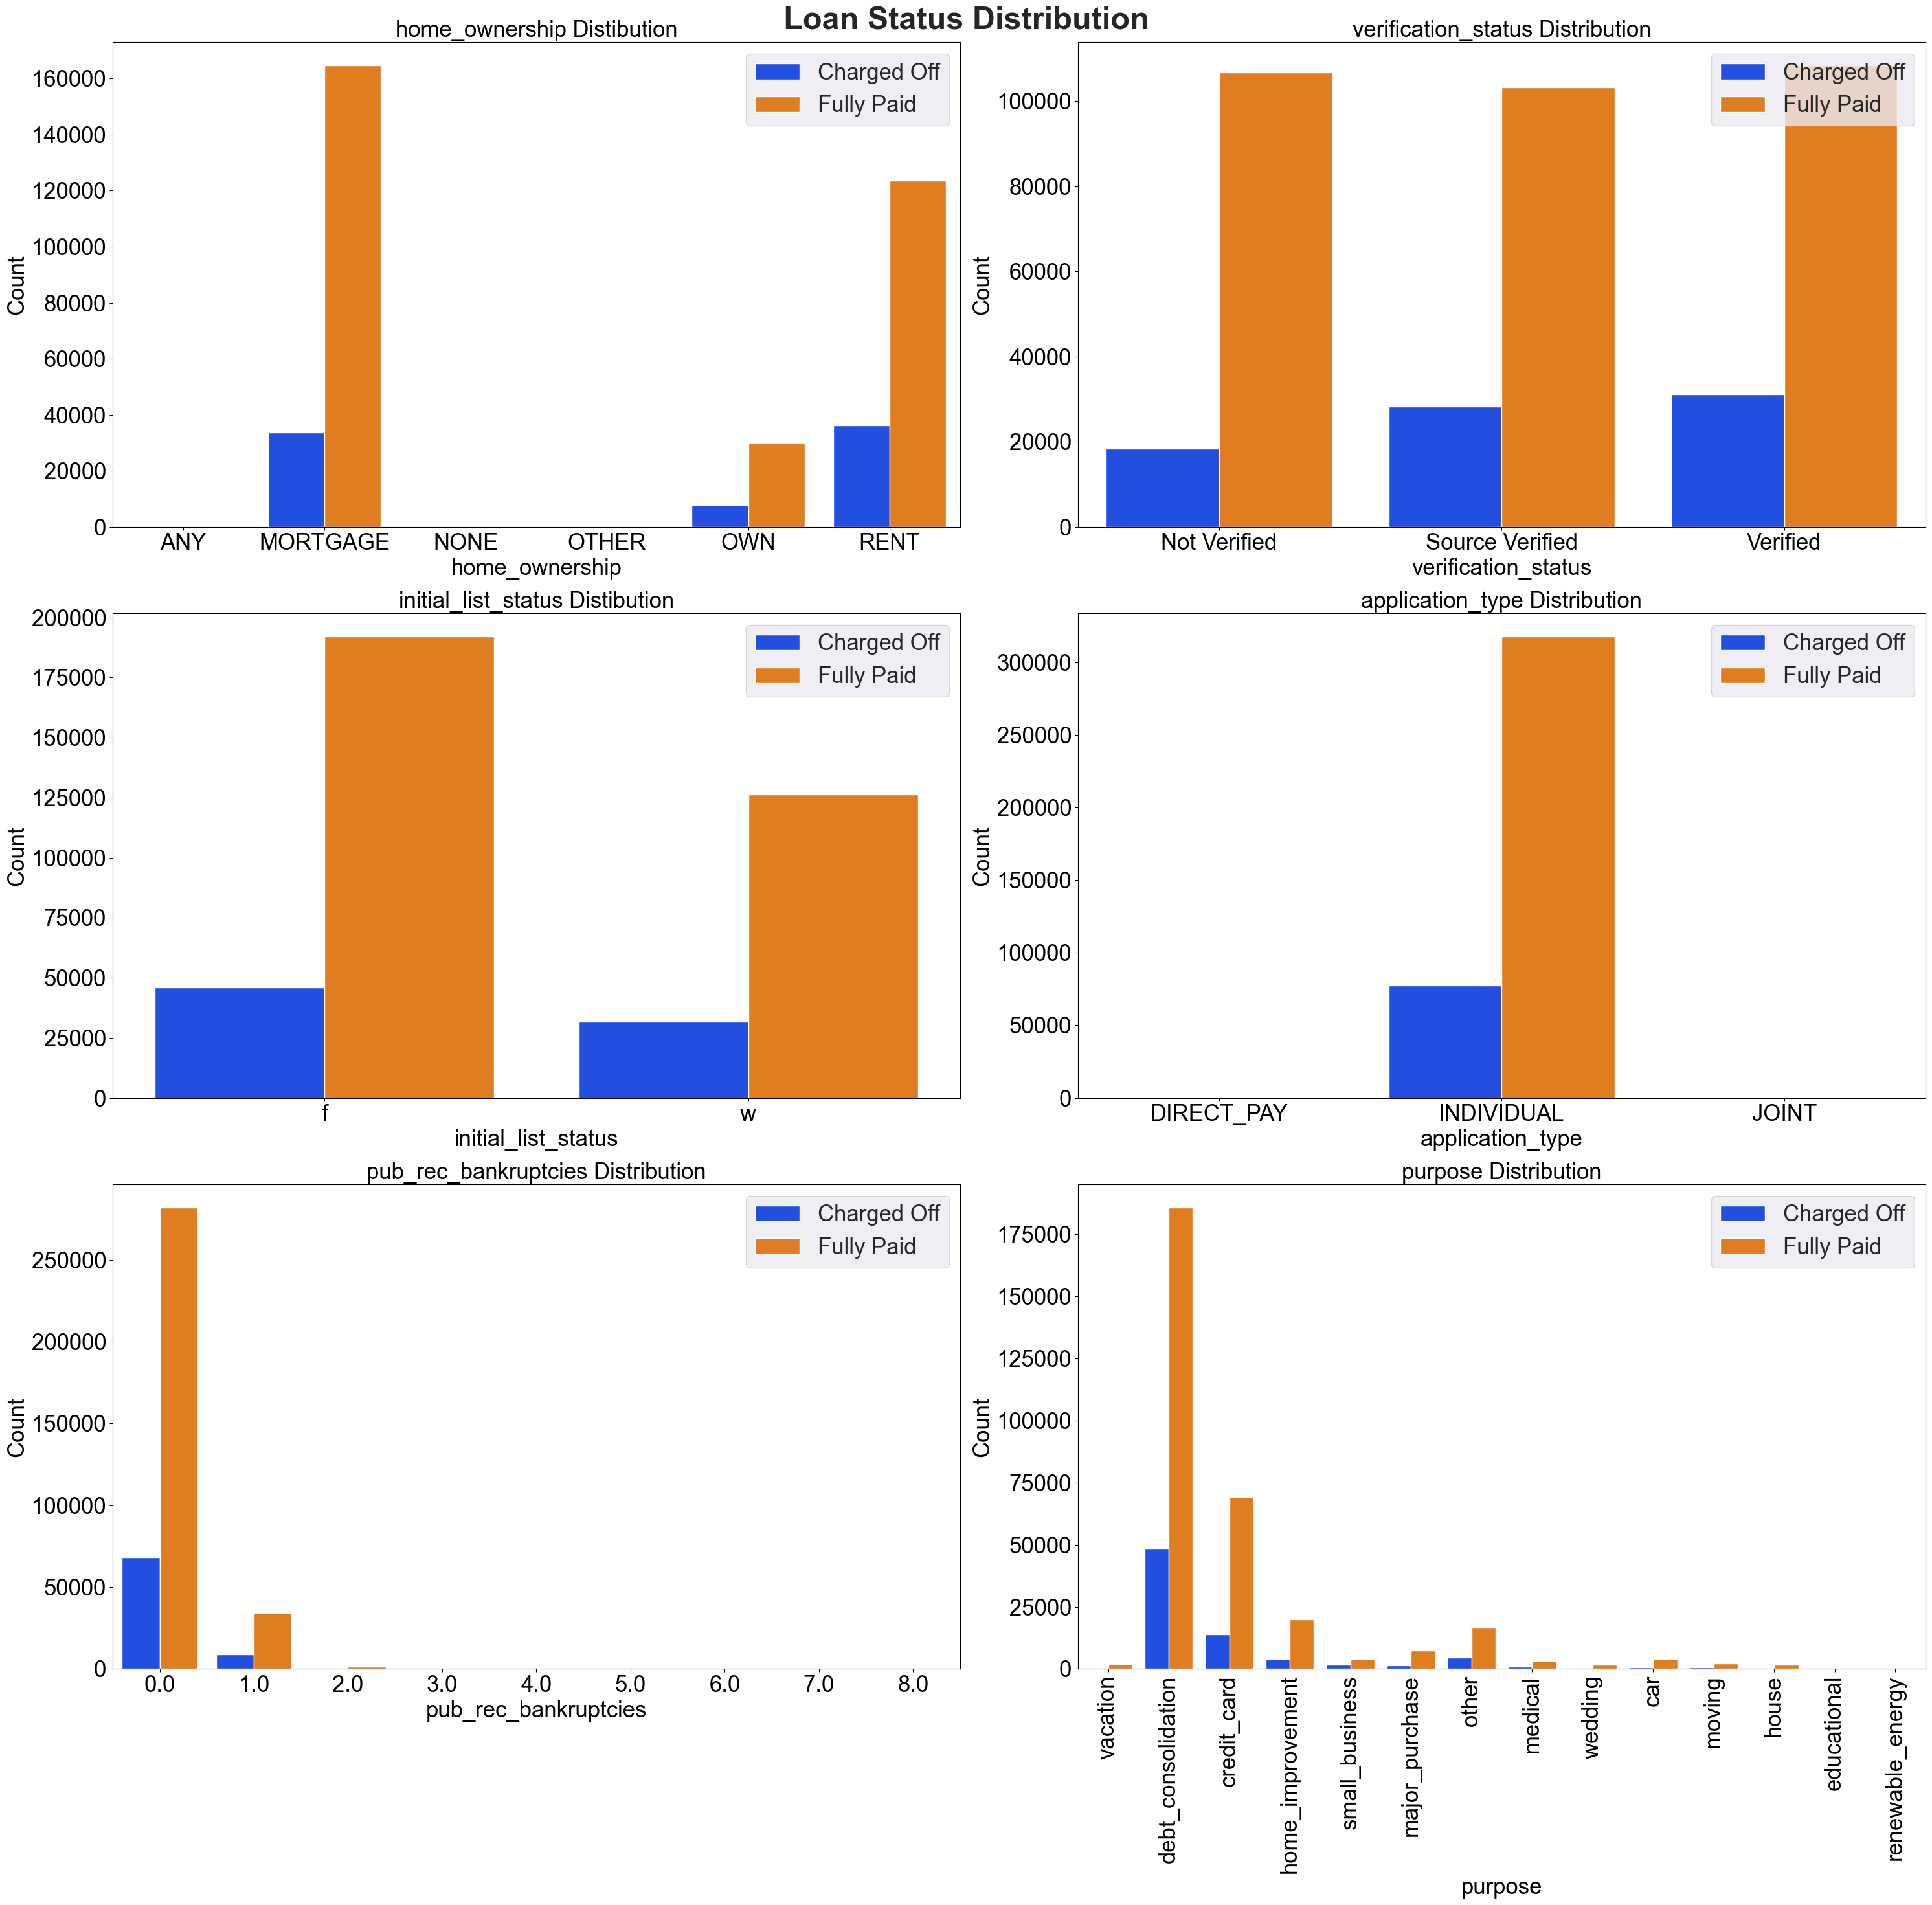

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)
sns.set()
fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', hue= 'loan_status', data= data, ax = axs[0][0],palette='bright')
graph.set_title("home_ownership Distibution", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)


sub_grade = sorted(data.sub_grade.unique().tolist())
graph = sns.countplot(x = 'verification_status', hue = 'loan_status', data = data, ax = axs[0][1], palette='bright')
graph.set_title("verification_status Distribution", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'initial_list_status', hue= 'loan_status', data= data, ax = axs[1][0],palette='bright')
graph.set_title("initial_list_status Distibution", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'application_type', hue = 'loan_status', data = data, ax = axs[1][1], palette='bright')
graph.set_title("application_type Distribution", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', hue = 'loan_status', data = data, ax = axs[2][0], palette='bright')
graph.set_title("pub_rec_bankruptcies Distribution", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'purpose', hue = 'loan_status', data = data, ax = axs[2][1], palette='bright')
graph.set_title("purpose Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

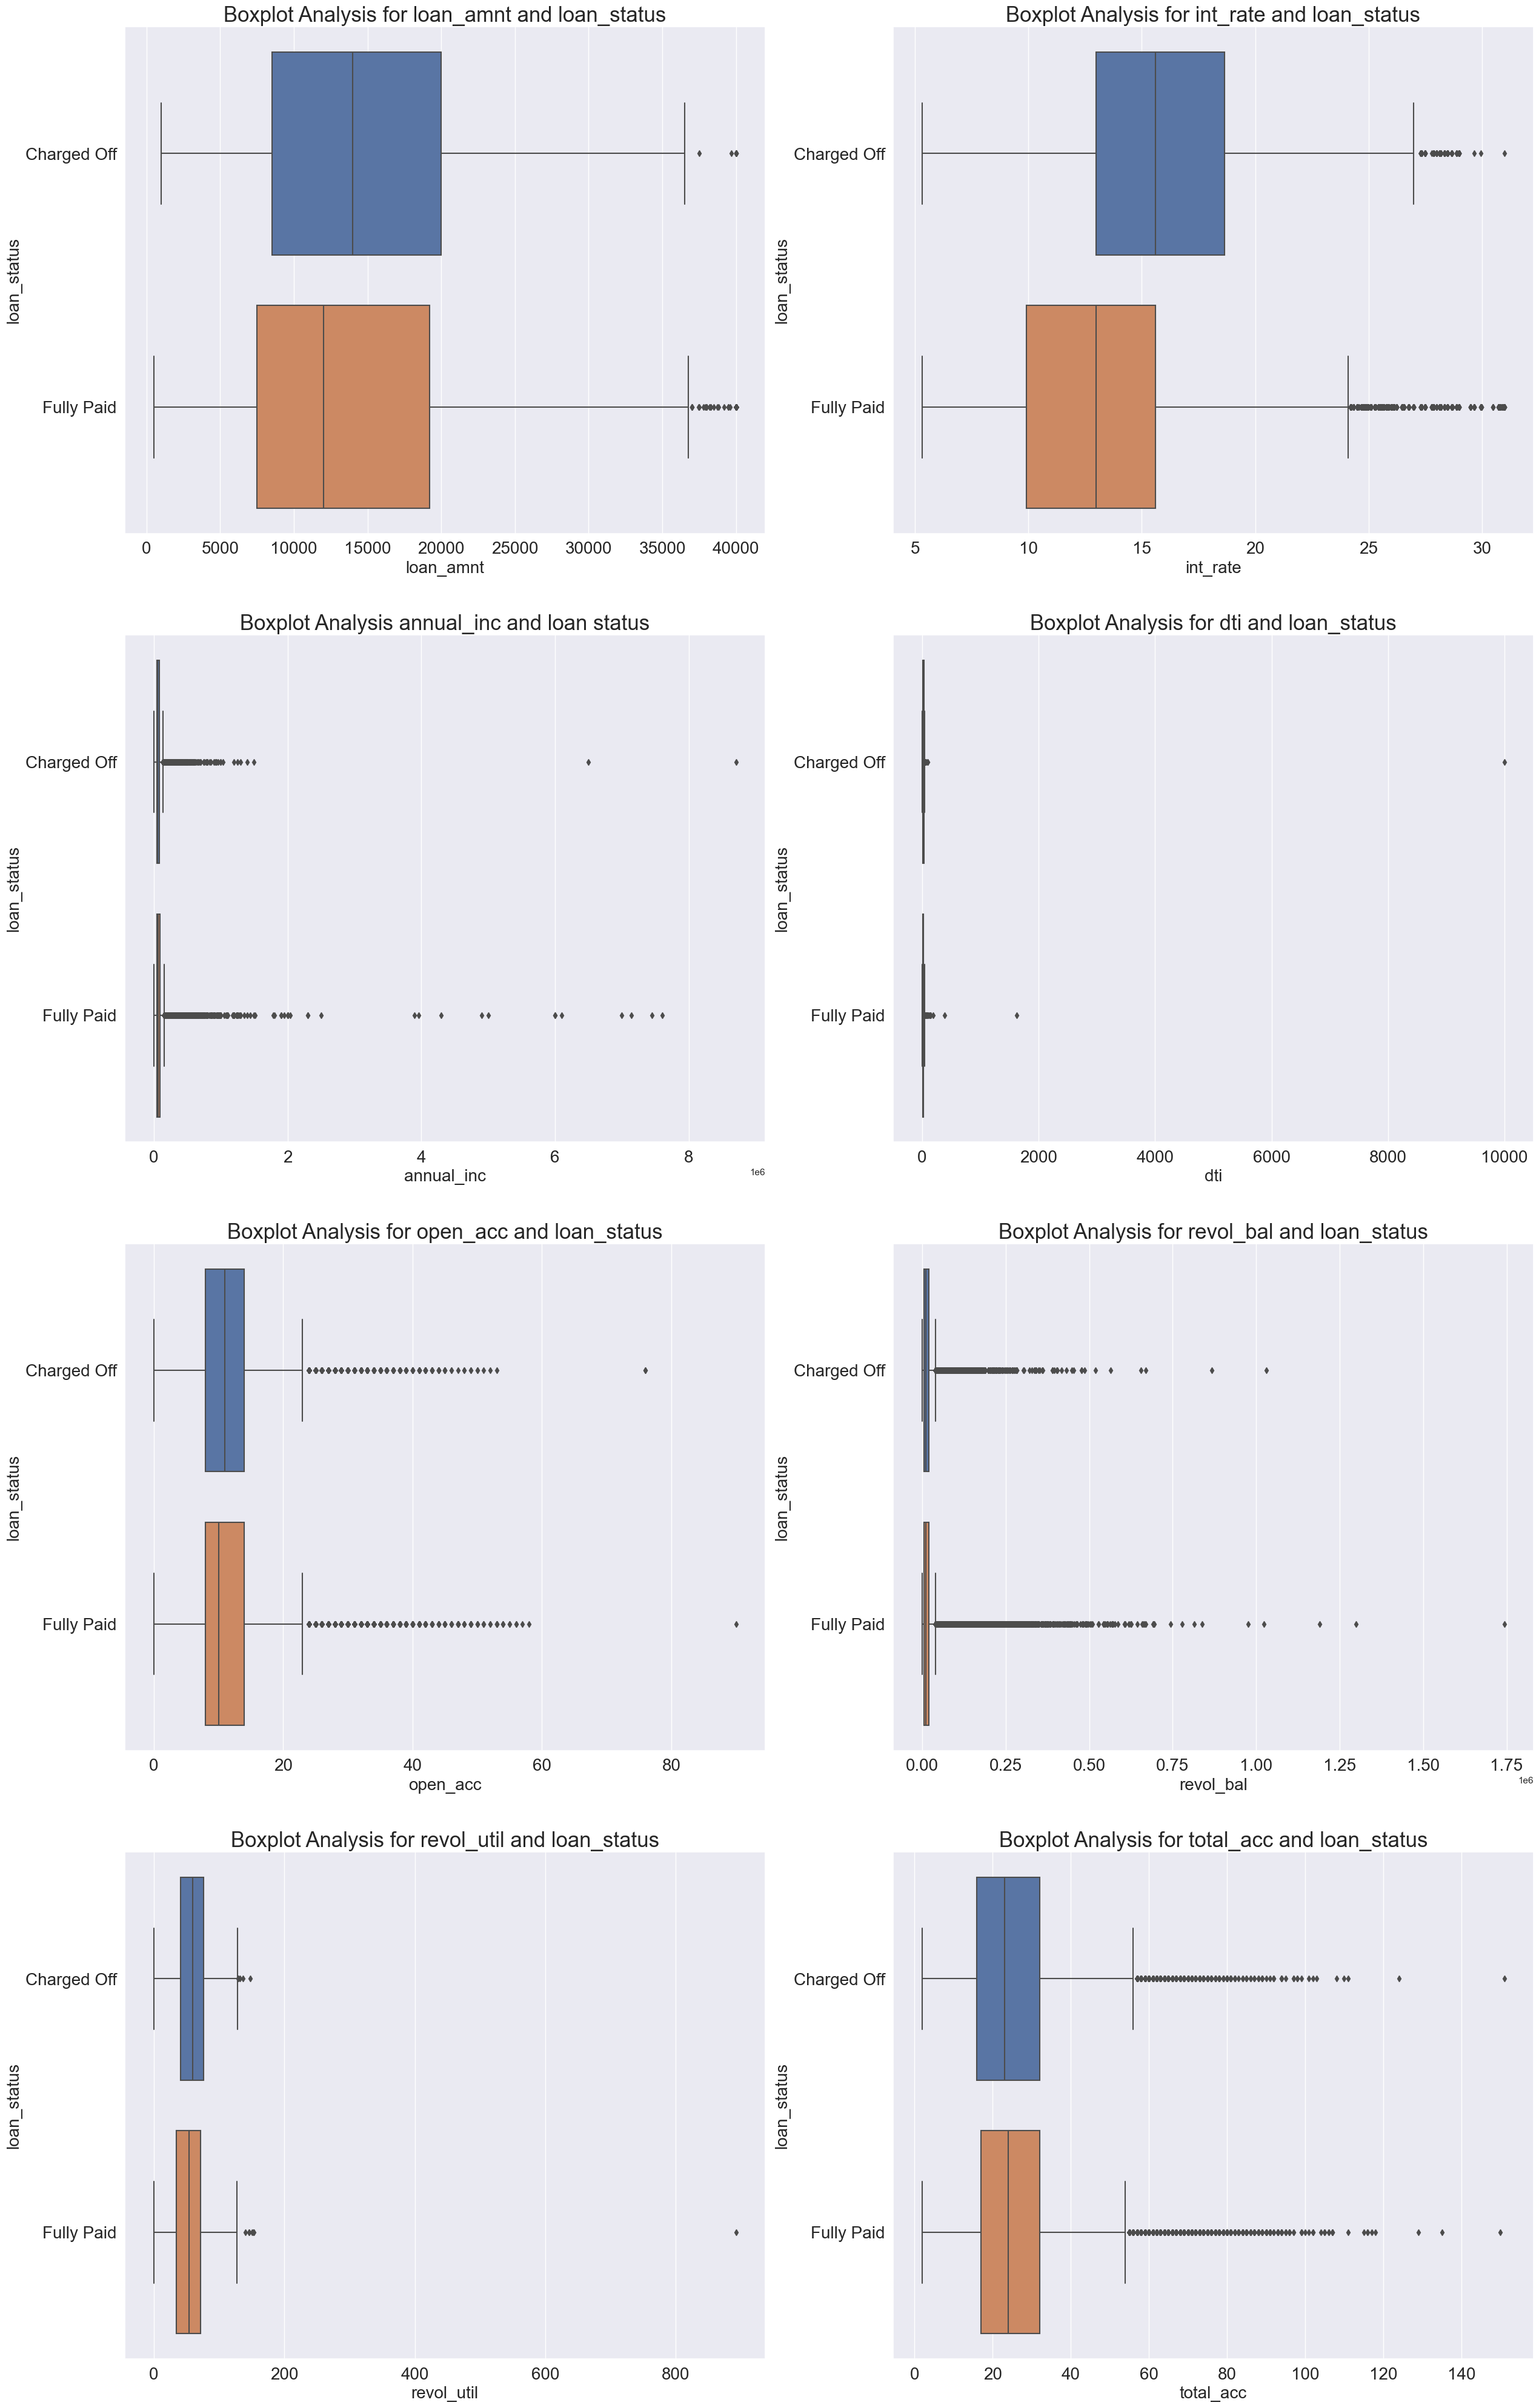

In [33]:
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= data, y = "loan_status",dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan_amnt and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= data, y = "loan_status", dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate and loan_status" 
graph.set_xlabel('int_rate', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= data, y = "loan_status", dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis annual_inc and loan status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= data, y = "loan_status", dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= data, y = "loan_status", dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= data, y = "loan_status", dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= data, y = "loan_status", dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_util and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= data, y = "loan_status", dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [34]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [35]:
data.emp_title = data.emp_title.str.lower()

In [36]:
data.emp_title.value_counts(normalize=True)[:10]

manager             0.015108
teacher             0.014554
registered nurse    0.007041
supervisor          0.006944
sales               0.006384
driver              0.006181
owner               0.005899
rn                  0.005559
project manager     0.004760
office manager      0.004390
Name: emp_title, dtype: float64

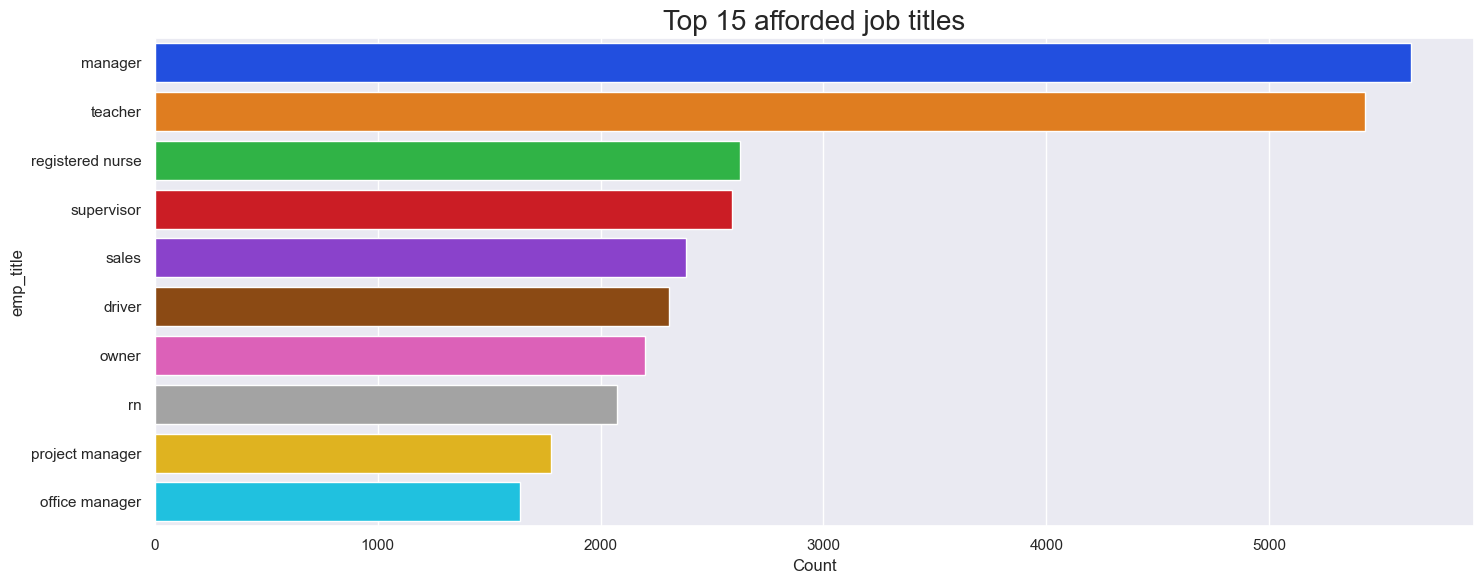

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.barplot( x = data.emp_title.value_counts()[:10],y = data['emp_title'].value_counts()[:10].index, palette='bright')
graph.set_title("Top 15 afforded job titles", fontsize = 20)
plt.xlabel("Count")
plt.ylabel("emp_title")
plt.tight_layout()
plt.show()

In [38]:
data['title'] = data.title.str.lower()

In [39]:
data.title.value_counts(normalize=True)[:10]

debt consolidation           0.426372
credit card refinancing      0.131332
home improvement             0.043414
other                        0.032954
consolidation                0.014160
major purchase               0.012676
debt consolidation loan      0.008910
business                     0.007652
medical expenses             0.007152
credit card consolidation    0.006691
Name: title, dtype: float64

In [40]:
data.mort_acc.value_counts()[:5]

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
5.0     18194
Name: mort_acc, dtype: int64

In [41]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [42]:
data['mort_acc'].fillna(np.round(data.mort_acc.mean()), inplace=True)

In [43]:
# Feature Engineering
# Home Ownership type Other None and Any has very less number of data so convert it to Other
data.home_ownership.replace(['NONE', 'ANY'], 'OTHER', inplace=True)
data.purpose.replace(['moving', 'vacation','house','wedding','renewable_energy','educational'],'other', inplace = True)
data['mort_acc'] = np.where((data.mort_acc >= 1),1,data.mort_acc)
# data.replace({'mort_acc' : { 0 : 0, 1 : 1, 2:2, 3:3}})
data['pub_rec'] = np.where((data.pub_rec >= 1),1,data.pub_rec)
def pub_rec_bankruptcies(val):
    if val == 0.0:
        return 0
    elif val >= 1.0:
        return 1
    else:
        return val
data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [44]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [45]:
data.emp_length.unique()

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '8 years', '7 years', '5 years', '1 year', NaN]
Length: 12
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year']

In [46]:
data['emp_length'] = data['emp_length'].str.rstrip(" years")
def emp_length(val):
    if val == "10+":
        return 10
    elif val == "< 1":
        return 0
    elif val in ["1","2", "3", "4", "5", "6", "7", "8", "9"]:
        return int(val)
    else:
        return val

In [47]:
data['emp_length'] = data.emp_length.apply(emp_length)

In [48]:
data['emp_length'].fillna(6.0, inplace = True)
data['emp_length'].astype(int)
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [49]:
data.dropna(inplace=True)
data.isnull().sum()/len(data)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [50]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])
data['zip_code'].value_counts(normalize=True)

70466    0.143828
30723    0.142728
22690    0.142620
48052    0.141296
00813    0.116215
29597    0.115427
05113    0.115187
11650    0.027740
93700    0.027692
86630    0.027268
Name: zip_code, dtype: float64

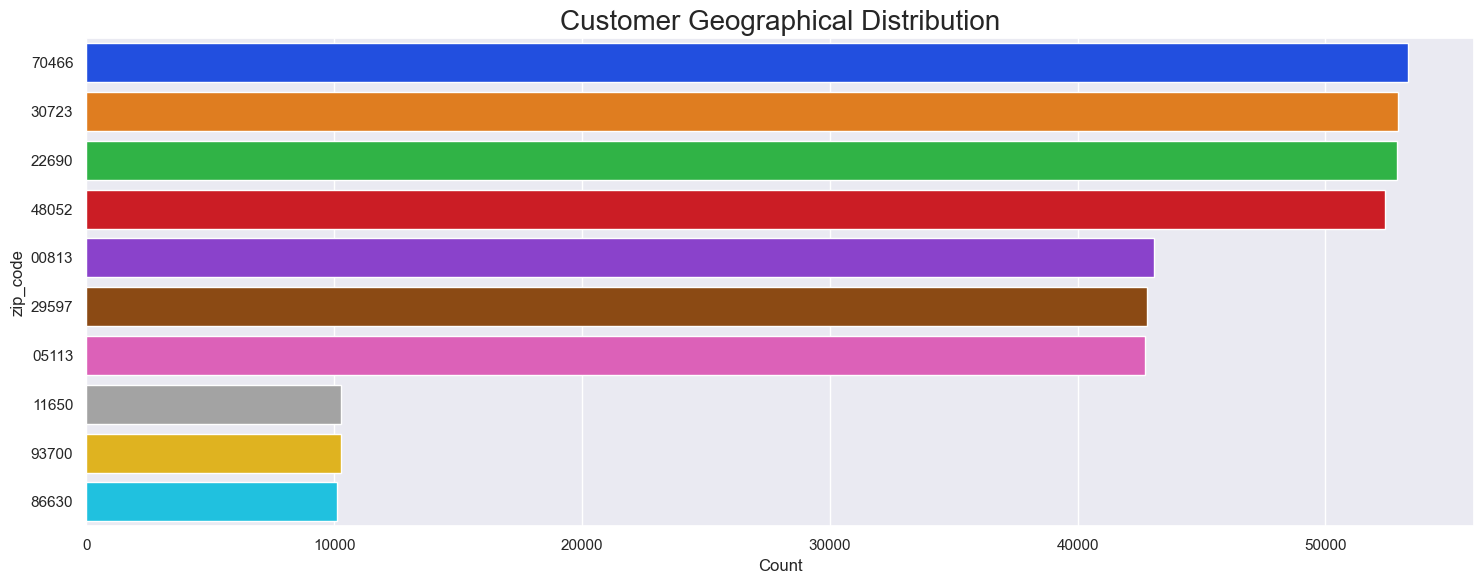

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.barplot( x = data.zip_code.value_counts(),y = data['zip_code'].value_counts().index, palette='bright')
graph.set_title("Customer Geographical Distribution", fontsize = 20)
plt.xlabel("Count")
plt.ylabel("zip_code")
plt.tight_layout()
plt.show()

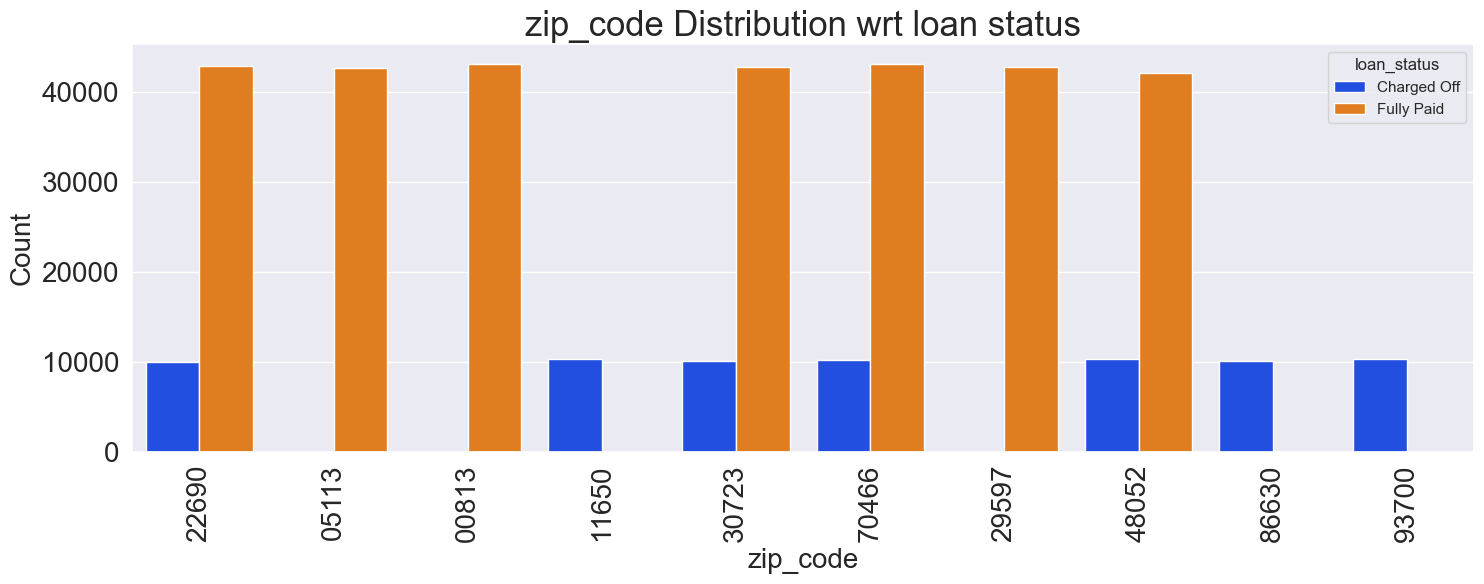

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.countplot(x = 'zip_code', hue = 'loan_status', data = data, palette='bright')
graph.set_title("zip_code Distribution wrt loan status", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('zip_code', fontsize=20);
graph.set_ylabel('Count', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

We Could see location with zip code 11650, 86630, 93700  are charged off, Nopeople from these areas fully paid thier loans. while people wit 05113 00813 and 29597 fully paid thier loans

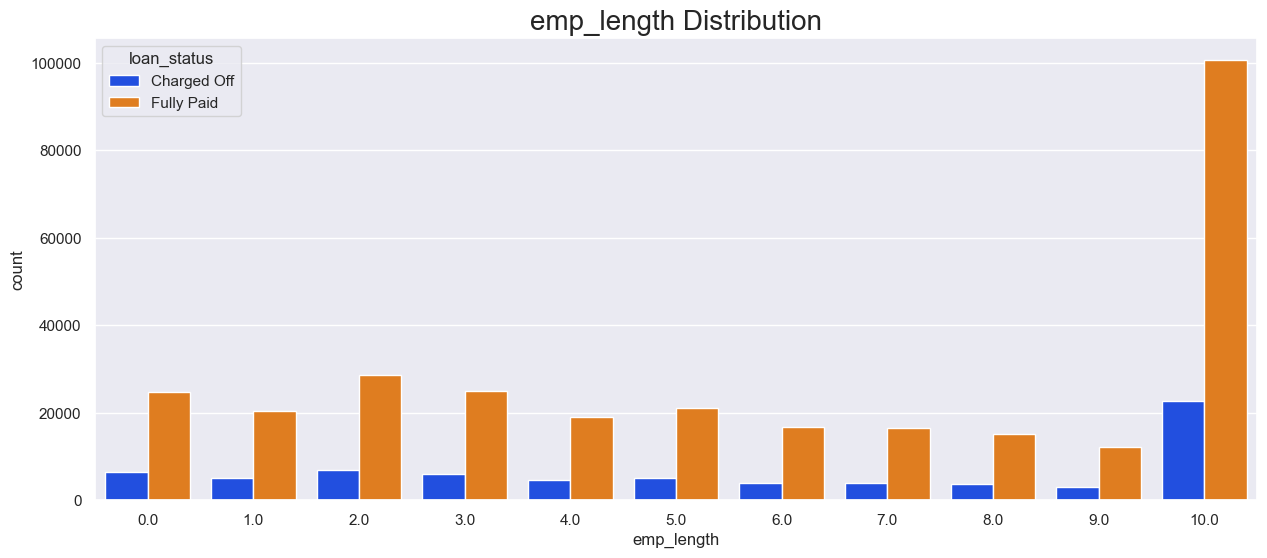

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
emp_length = sorted(data.emp_length.unique().tolist())
graph = sns.countplot(x = 'emp_length', hue = 'loan_status', data = data, palette='bright')
graph.set_title("emp_length Distribution", fontsize = 20)
plt.show()

In [54]:
data.describe()

loan_amnt       int_rate     emp_length    annual_inc  \
count  370797.000000  370797.000000  370797.000000  3.707970e+05   
mean    14247.957238      13.636911       5.934679  7.517695e+04   
std      8357.737390       4.471511       3.644196  6.208139e+04   
min       500.000000       5.320000       0.000000  4.000000e+03   
25%      8000.000000      10.490000       3.000000  4.600000e+04   
50%     12000.000000      13.330000       6.000000  6.500000e+04   
75%     20000.000000      16.490000      10.000000  9.000000e+04   
max     40000.000000      30.990000      10.000000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  370797.000000  370797.000000  370797.000000  3.707970e+05   
mean       17.336758      11.392821       0.141279  1.594794e+04   
std         8.104004       5.146589       0.348310  2.053577e+04   
min         0.000000       1.000000       0.000000  0.000000e+00   
25%        11.320000       8.000000       0.000000  6.113000e+03   
50%        16.900000      11.000000       0.000000  1.130000e+04   
75%        22.930000      14.000000       0.000000  1.976500e+04   
max       380.530000      90.000000       1.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  370797.000000  370797.000000  370797.000000         370797.000000  
mean       53.986847      25.516717       0.645288              0.109933  
std        24.391310      11.886877       0.478426              0.312807  
min         0.000000       2.000000       0.000000              0.000000  
25%        36.100000      17.000000       0.000000              0.000000  
50%        55.000000      24.000000       1.000000              0.000000  
75%        73.000000      32.000000       1.000000              0.000000  
max       892.300000     151.000000       1.000000              1.000000

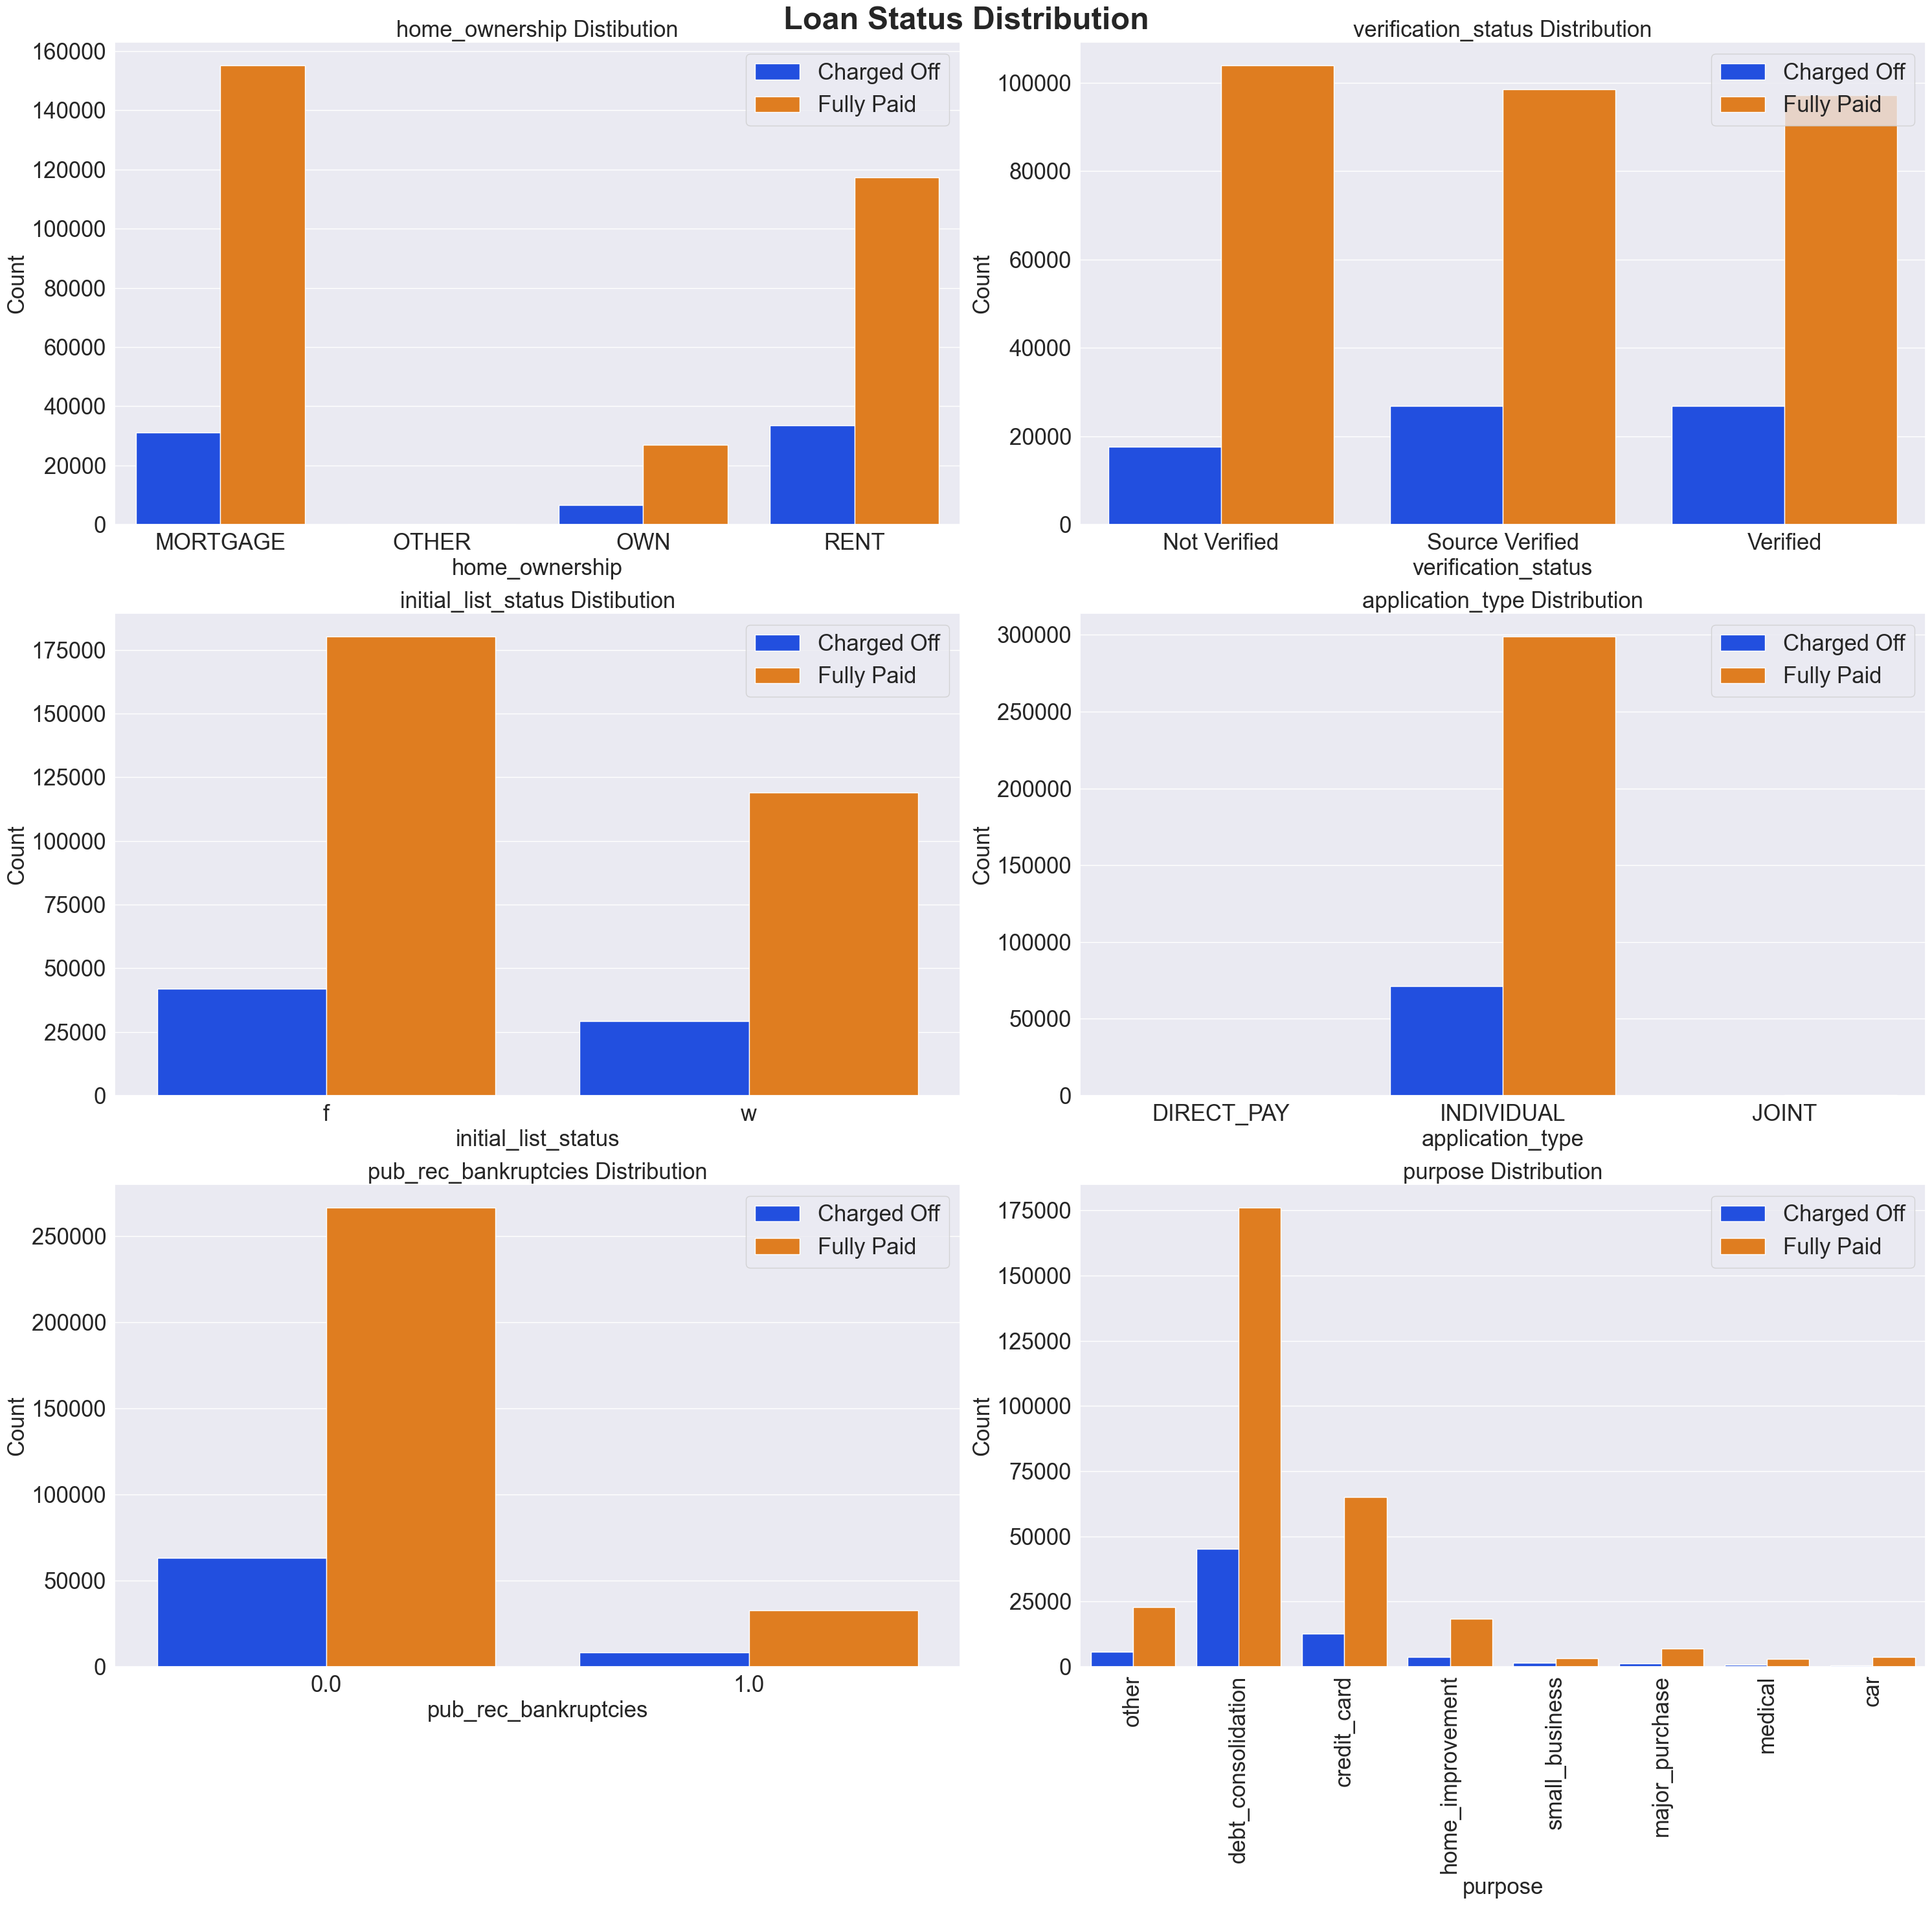

In [55]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)
sns.set()
fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', hue= 'loan_status', data= data, ax = axs[0][0],palette='bright')
graph.set_title("home_ownership Distibution", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)


sub_grade = sorted(data.sub_grade.unique().tolist())
graph = sns.countplot(x = 'verification_status', hue = 'loan_status', data = data, ax = axs[0][1], palette='bright')
graph.set_title("verification_status Distribution", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'initial_list_status', hue= 'loan_status', data= data, ax = axs[1][0],palette='bright')
graph.set_title("initial_list_status Distibution", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'application_type', hue = 'loan_status', data = data, ax = axs[1][1], palette='bright')
graph.set_title("application_type Distribution", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', hue = 'loan_status', data = data, ax = axs[2][0], palette='bright')
graph.set_title("pub_rec_bankruptcies Distribution", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'purpose', hue = 'loan_status', data = data, ax = axs[2][1], palette='bright')
graph.set_title("purpose Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

In [56]:
toCategory.extend(["pub_rec","mort_acc", "pub_rec_bankruptcies"])

In [57]:
for x in toCategory:
    data[x] = data[x].astype('category')

In [58]:
numerical_data = data.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

8

### Outlier Treatment with respect to Loan Status

In [59]:
data.groupby(by='loan_status').mean()

loan_amnt   int_rate    annual_inc        dti   open_acc  \
loan_status                                                                
Charged Off  15381.370514  15.930311  68754.915524  19.515227  11.730511   
Fully Paid   13978.088104  13.090846  76706.053244  16.818058  11.312417   

                revol_bal  revol_util  total_acc  
loan_status                                       
Charged Off  15527.322330   58.032521  25.148803  
Fully Paid   16048.093767   53.023560  25.604318

In [60]:
data.groupby(by='loan_status').std()

loan_amnt  int_rate    annual_inc       dti  open_acc  \
loan_status                                                            
Charged Off  8495.826197  4.381654  59034.629748  8.339517  5.305832   
Fully Paid   8301.757352  4.316636  62688.238474  7.959522  5.104658   

                revol_bal  revol_util  total_acc  
loan_status                                       
Charged Off  17890.442332   23.441936  11.928235  
Fully Paid   21115.633137   24.513781  11.875348

In [61]:
upperLimit = data.groupby(by='loan_status').mean() + 3 * data.groupby(by='loan_status').std()
upperLimit

loan_amnt   int_rate     annual_inc        dti   open_acc  \
loan_status                                                                 
Charged Off  40868.849105  29.075273  245858.804768  44.533779  27.648006   
Fully Paid   38883.360161  26.040755  264770.768666  40.696623  26.626392   

                revol_bal  revol_util  total_acc  
loan_status                                       
Charged Off  69198.649327  128.358328  60.933510  
Fully Paid   79394.993177  126.564902  61.230362

In [62]:
lowerLimit = data.groupby(by='loan_status').mean() - 3 * data.groupby(by='loan_status').std()
lowerLimit

loan_amnt  int_rate     annual_inc       dti  open_acc  \
loan_status                                                              
Charged Off -10106.108077  2.785349 -108348.973719 -5.503325 -4.186985   
Fully Paid  -10927.183953  0.140936 -111358.662177 -7.060507 -4.001559   

                revol_bal  revol_util  total_acc  
loan_status                                       
Charged Off -38144.004668  -12.293286 -10.635903  
Fully Paid  -47298.805643  -20.517782 -10.021726

In [63]:
data[((data.loan_status == 'Charged Off') & (data['loan_amnt'] > lowerLimit['loan_amnt']["Charged Off"]) & (data['loan_amnt'] < upperLimit['loan_amnt']["Charged Off"])) | ((data.loan_status == 'Fully Paid') & (data['loan_amnt'] > lowerLimit['loan_amnt']["Fully Paid"]) & (data['loan_amnt'] < upperLimit['loan_amnt']["Fully Paid"]))]

loan_amnt        term  int_rate grade sub_grade  \
0         10000.0   36 months     11.44     B        B4   
1          8000.0   36 months     11.99     B        B5   
2         15600.0   36 months     10.49     B        B3   
3          7200.0   36 months      6.49     A        A2   
4         24375.0   60 months     17.27     C        C5   
...           ...         ...       ...   ...       ...   
396025    10000.0   60 months     10.99     B        B4   
396026    21000.0   36 months     12.29     C        C1   
396027     5000.0   36 months      9.99     B        B1   
396028    21000.0   60 months     15.31     C        C2   
396029     2000.0   36 months     13.61     C        C2   

                       emp_title emp_length home_ownership  annual_inc  \
0                      marketing       10.0           RENT    117000.0   
1                credit analyst         4.0       MORTGAGE     65000.0   
2                   statistician        0.0           RENT     43057.0   
3                client advocate        6.0           RENT     54000.0   
4        destiny management inc.        9.0       MORTGAGE     55000.0   
...                          ...        ...            ...         ...   
396025          licensed bankere        2.0           RENT     40000.0   
396026                     agent        5.0       MORTGAGE    110000.0   
396027              city carrier       10.0           RENT     56500.0   
396028      gracon services, inc       10.0       MORTGAGE     64000.0   
396029  internal revenue service       10.0           RENT     42996.0   

       verification_status  ... pub_rec revol_bal revol_util total_acc  \
0             Not Verified  ...     0.0   36369.0       41.8      25.0   
1             Not Verified  ...     0.0   20131.0       53.3      27.0   
2          Source Verified  ...     0.0   11987.0       92.2      26.0   
3             Not Verified  ...     0.0    5472.0       21.5      13.0   
4                 Verified  ...     0.0   24584.0       69.8      43.0   
...                    ...  ...     ...       ...        ...       ...   
396025     Source Verified  ...     0.0    1990.0       34.3      23.0   
396026     Source Verified  ...     0.0   43263.0       95.7       8.0   
396027            Verified  ...     0.0   32704.0       66.9      23.0   
396028            Verified  ...     0.0   15704.0       53.8      20.0   
396029            Verified  ...     0.0    4292.0       91.3      19.0   

        initial_list_status application_type  mort_acc pub_rec_bankruptcies  \
0                         w       INDIVIDUAL       0.0                  0.0   
1                         f       INDIVIDUAL       1.0                  0.0   
2                         f       INDIVIDUAL       0.0                  0.0   
3                         f       INDIVIDUAL       0.0                  0.0   
4                         f       INDIVIDUAL       1.0                  0.0   
...                     ...              ...       ...                  ...   
396025                    w       INDIVIDUAL       0.0                  0.0   
396026                    f       INDIVIDUAL       1.0                  0.0   
396027                    f       INDIVIDUAL       0.0                  0.0   
396028                    f       INDIVIDUAL       1.0                  0.0   
396029                    f       INDIVIDUAL       1.0                  0.0   

                                                  address  zip_code  
0          0174 Michelle Gateway\r\nMendozaberg, OK 22690     22690  
1       1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113     05113  
2       87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113     05113  
3                 823 Reid Ford\r\nDelacruzside, MA 00813     00813  
4                  679 Luna Roads\r\nGreggshire, VA 11650     11650  
...                                                   ...       ...  
396025   12951 Williams Crossing\r\nJohnnyville, DC 30723     30723  
396026  0114

In [64]:
# Outlier Treatment
for x in num_cols:
    data = data[((data.loan_status == 'Charged Off') & (data[x] > lowerLimit[x]["Charged Off"]) & (data[x] < upperLimit[x]["Charged Off"])) | ((data.loan_status == 'Fully Paid') & (data[x] > lowerLimit[x]["Fully Paid"]) & (data[x] < upperLimit[x]["Fully Paid"]))]

In [65]:
data.shape

(356554, 27)

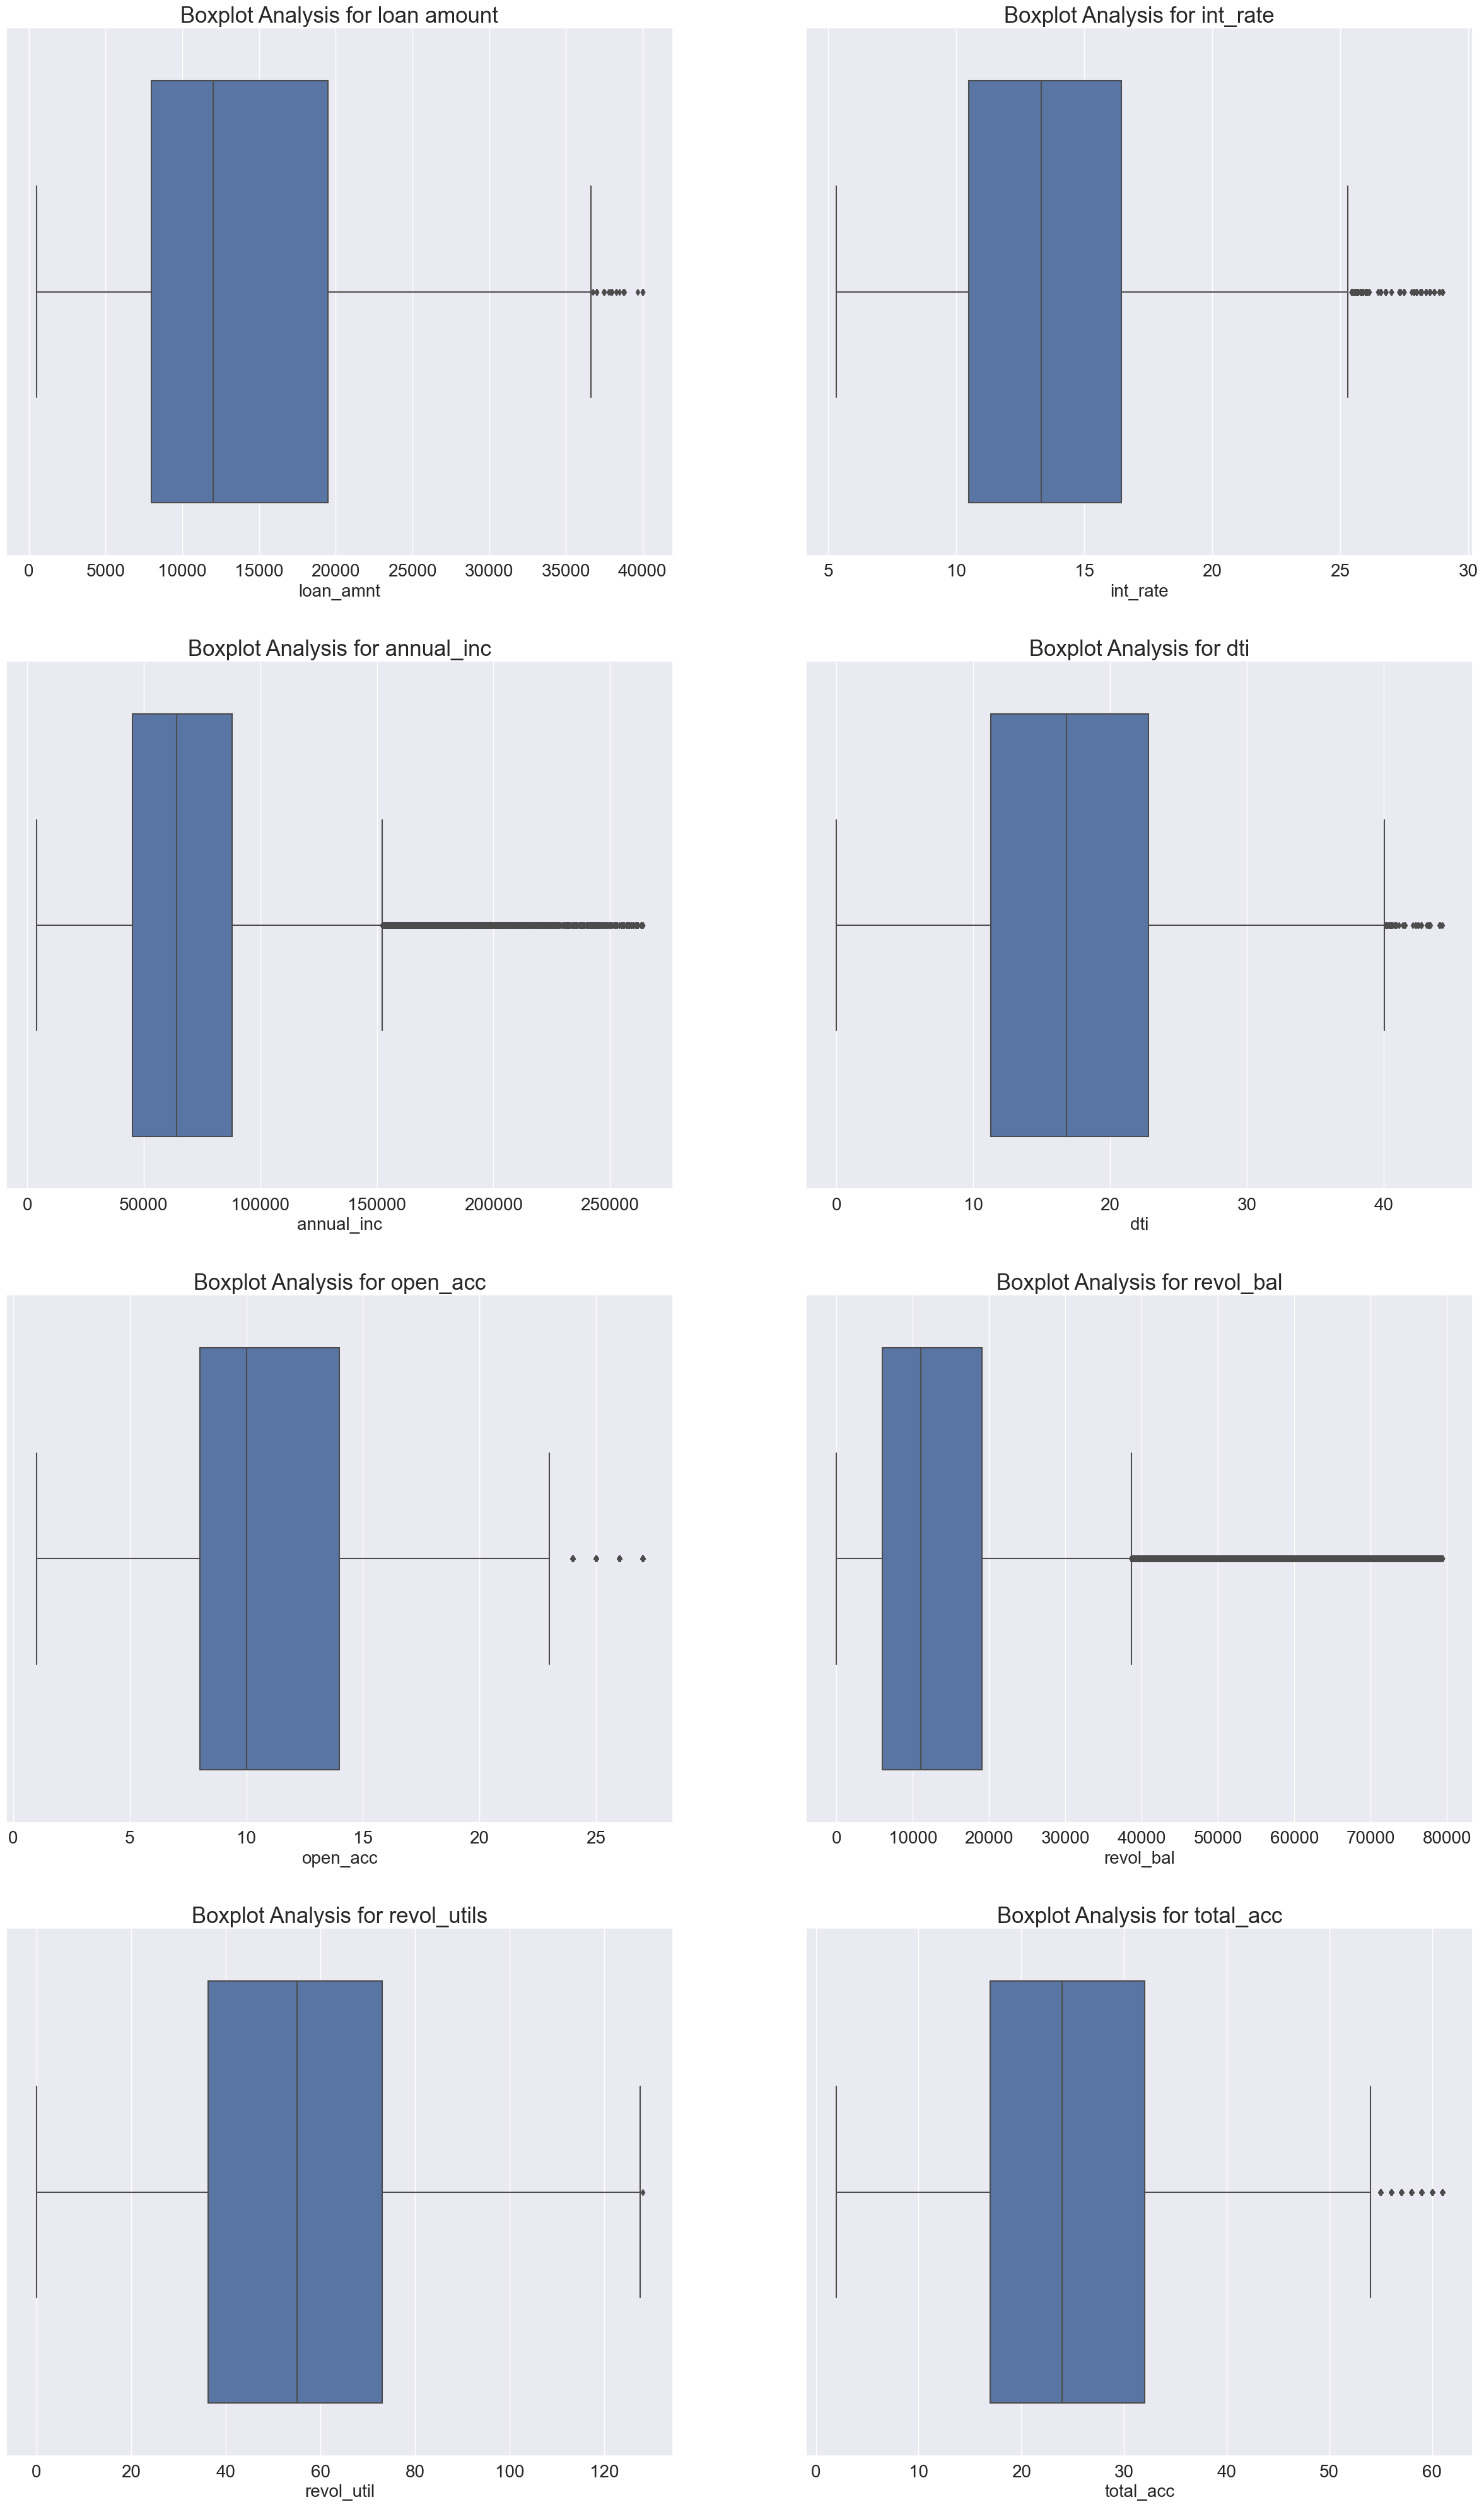

In [66]:
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= data,dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan amount" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= data, dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate" 
graph.set_xlabel('int_rate', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= data, dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis for annual_inc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= data, dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= data, dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= data, dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= data, dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_utils" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= data, dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

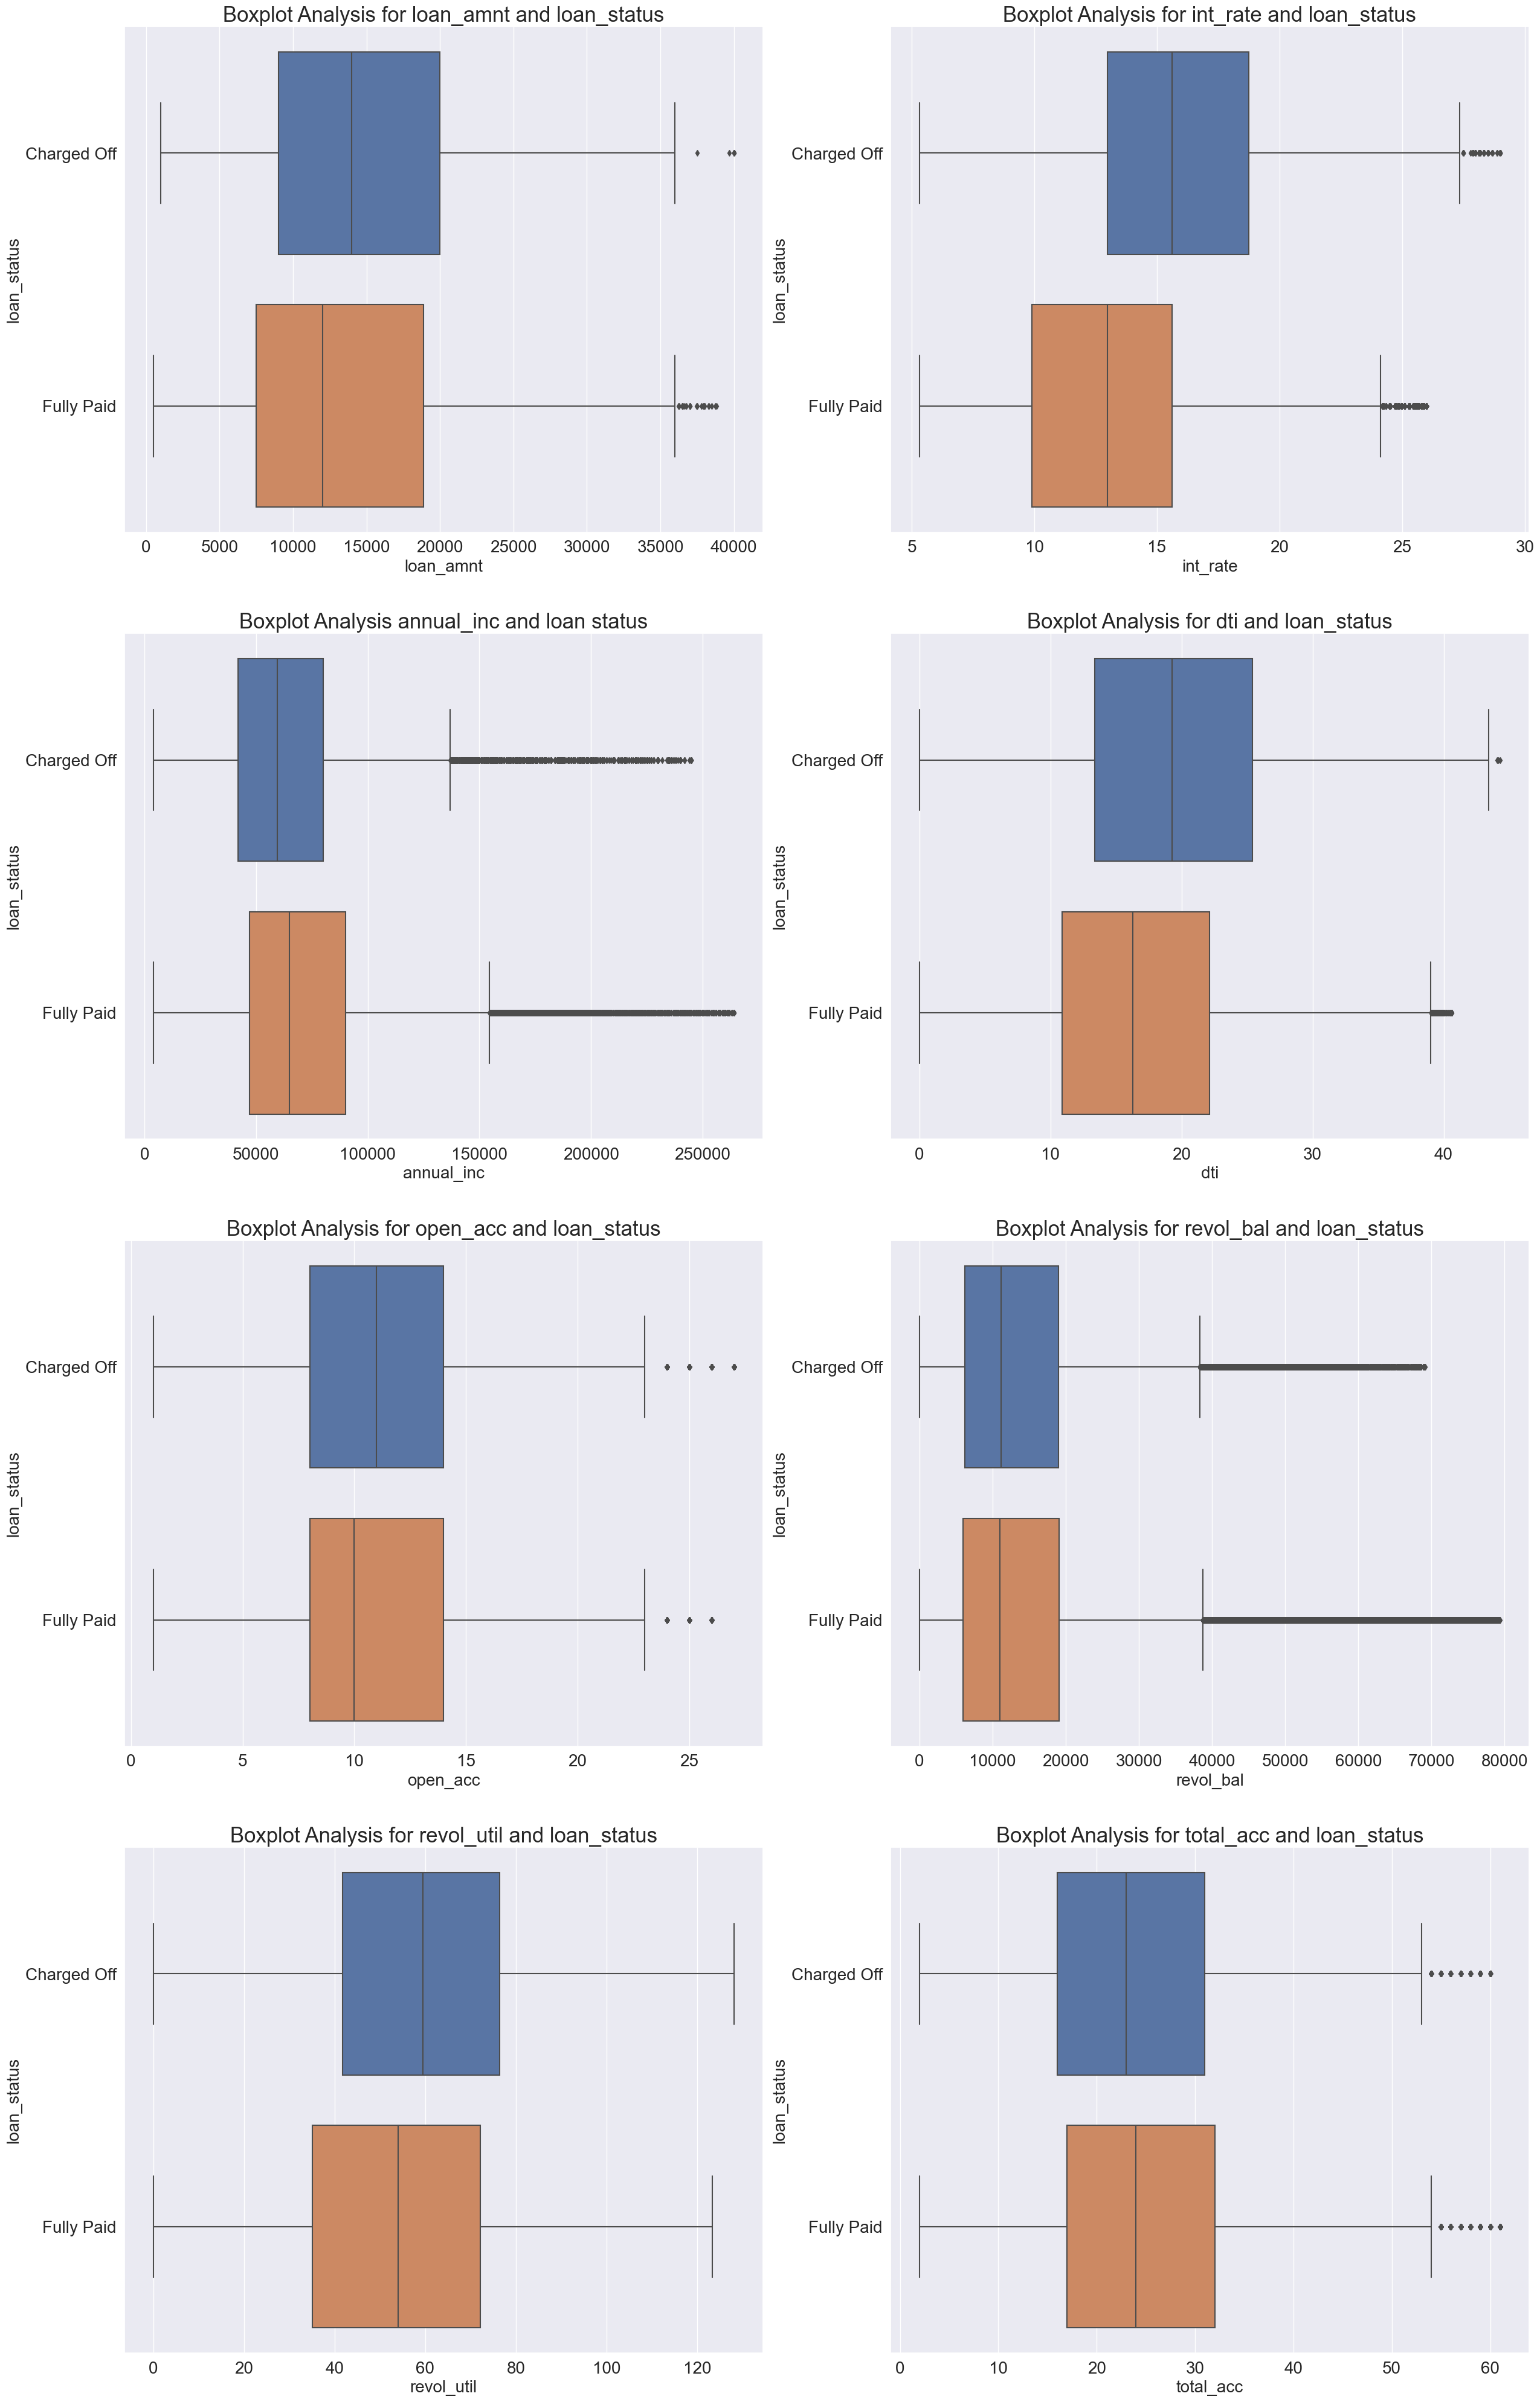

In [67]:
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= data, y = "loan_status",dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan_amnt and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= data, y = "loan_status", dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate and loan_status" 
graph.set_xlabel('int_rate', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= data, y = "loan_status", dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis annual_inc and loan status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= data, y = "loan_status", dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= data, y = "loan_status", dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= data, y = "loan_status", dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= data, y = "loan_status", dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_util and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= data, y = "loan_status", dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [68]:
data.earliest_cr_line.value_counts()

Oct-2000    2763
Oct-2001    2700
Aug-2000    2694
Aug-2001    2667
Oct-1999    2526
            ... 
Jan-1944       1
Nov-1957       1
Jul-1955       1
Oct-1950       1
Aug-1962       1
Name: earliest_cr_line, Length: 661, dtype: int64

In [69]:
data.drop(columns=['sub_grade','emp_title', 'issue_d','title','address', 'earliest_cr_line'], axis=1, inplace=True)

### Feature Encoding

In [70]:
term_values = {' 36 months': 0, ' 60 months': 1}
data['term'] = data.term.map(term_values)
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})
data['pub_rec'] = data.pub_rec.map({0.0 : 0 , 1.0 : 1})
data['initial_list_status'] = data.initial_list_status.map({"f" : 0 , "w" : 1})
# data['mort_acc'] = data.mort_acc.map({0.0 : 0 , 1.0 : 1})
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.map({0.0 : 0 , 1.0 : 1})

In [71]:
data.describe(include='all')

loan_amnt      term       int_rate   grade  emp_length  \
count   356554.000000  356554.0  356554.000000  356554    356554.0   
unique            NaN       2.0            NaN       7        11.0   
top               NaN       0.0            NaN       B        10.0   
freq              NaN  271143.0            NaN  105254    117765.0   
mean     14001.386746       NaN      13.611364     NaN         NaN   
std       8190.236684       NaN       4.420285     NaN         NaN   
min        500.000000       NaN       5.320000     NaN         NaN   
25%       8000.000000       NaN      10.490000     NaN         NaN   
50%      12000.000000       NaN      13.330000     NaN         NaN   
75%      19500.000000       NaN      16.450000     NaN         NaN   
max      40000.000000       NaN      28.990000     NaN         NaN   

       home_ownership     annual_inc verification_status  loan_status  \
count          356554  356554.000000              356554     356554.0   
unique              4            NaN                   3          2.0   
top          MORTGAGE            NaN     Source Verified          0.0   
freq           176902            NaN              120085     287844.0   
mean              NaN   71426.602227                 NaN          NaN   
std               NaN   36254.319990                 NaN          NaN   
min               NaN    4000.000000                 NaN          NaN   
25%               NaN   45162.000000                 NaN          NaN   
50%               NaN   64000.000000                 NaN          NaN   
75%               NaN   88000.000000                 NaN          NaN   
max               NaN  264000.000000                 NaN          NaN   

                   purpose  ...       open_acc   pub_rec      revol_bal  \
count               356554  ...  356554.000000  356554.0  356554.000000   
unique                   8  ...            NaN       2.0            NaN   
top     debt_consolidation  ...            NaN       0.0            NaN   
freq                213211  ...            NaN  305776.0            NaN   
mean                   NaN  ...      11.065466       NaN   14237.862509   
std                    NaN  ...       4.608835       NaN   11731.911387   
min                    NaN  ...       1.000000       NaN       0.000000   
25%                    NaN  ...       8.000000       NaN    6004.000000   
50%                    NaN  ...      10.000000       NaN   11034.000000   
75%                    NaN  ...      14.000000       NaN   19058.000000   
max                    NaN  ...      27.000000       NaN   79379.000000   

           revol_util      total_acc  initial_list_status  application_type  \
count   356554.000000  356554.000000             356554.0            356554   
unique            NaN            NaN                  2.0                 3   
top               NaN            NaN                  0.0        INDIVIDUAL   
freq              NaN            NaN             215233.0            356216   
mean        54.054251      24.810621                  NaN               NaN   
std         24.284908      10.987201                  NaN               NaN   
min          0.000000       2.000000                  NaN               NaN   
25%         36.300000      17.000000                  NaN               NaN   
50%         55.100000      24.000000                  NaN               NaN   
75%         73.000000      32.000000                  NaN               NaN   
max        128.100000      61.000000                  NaN               NaN   

        mort_acc  pub_rec_bankruptcies  zip_code  
count   356554.0              356554.0    356554  
unique       2.0                   2.0        10  
top          1.0                   0.0     70466  
freq    227837.0              316814.0     51273  
mean         NaN                   NaN       NaN  
std          NaN                   NaN       NaN  
min          NaN                   NaN       NaN  
25%          NaN                   N

In [72]:
dummies = ['grade','emp_length','home_ownership','verification_status','purpose','application_type','zip_code','mort_acc']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data.head()

loan_amnt term  int_rate  annual_inc loan_status    dti  open_acc pub_rec  \
0    10000.0    0     11.44    117000.0           0  26.24      16.0       0   
1     8000.0    0     11.99     65000.0           0  22.05      17.0       0   
2    15600.0    0     10.49     43057.0           0  12.79      13.0       0   
3     7200.0    0      6.49     54000.0           0   2.60       6.0       0   
4    24375.0    1     17.27     55000.0           1  33.95      13.0       0   

   revol_bal  revol_util  total_acc initial_list_status pub_rec_bankruptcies  \
0    36369.0        41.8       25.0                   1                    0   
1    20131.0        53.3       27.0                   0                    0   
2    11987.0        92.2       26.0                   0                    0   
3     5472.0        21.5       13.0                   0                    0   
4    24584.0        69.8       43.0                   0                    0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  emp_length_1.0  \
0        1        0        0        0        0        0               0   
1        1        0        0        0        0        0               0   
2        1        0        0        0        0        0               0   
3        0        0        0        0        0        0               0   
4        0        1        0        0        0        0               0   

   emp_length_2.0  emp_length_3.0  emp_length_4.0  emp_length_5.0  \
0               0               0               0               0   
1               0               0               1               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   emp_length_6.0  emp_length_7.0  emp_length_8.0  emp_length_9.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               1   

   emp_length_10.0  home_ownership_OTHER  home_ownership_OWN  \
0                1                     0                   0   
1                0                     0                   0   
2                0                     0                   0   
3                0                     0                   0   
4                0                     0                   0   

   home_ownership_RENT  verification_status_Source Verified  \
0                    1                                    0   
1                    0                                    0   
2                    1                                    1   
3                    1                                    0   
4                    0                                    0   

   verification_status_Verified  purpose_credit_card  \
0                             0                    0   
1                             0                    0   
2                             0                    1   
3                             0                    1   
4                             1                    1   

   purpose_debt_consolidation  purpose_home_improvement  \
0                           0                         0   
1                           1                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   purpose_major_purchase  purpose_medical  purpose_other  \
0                       0                0              1   
1                       0                0              0   
2                       0                0              0   
3                       0                0              0   

In [74]:
data.shape

(356554, 53)

In [75]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [76]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'pub_rec_bankruptcies', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_1.0',
       'emp_length_2.0', 'emp_length_3.0', 'emp_length_4.0', 'emp_length_5.0',
       'emp_length_6.0', 'emp_length_7.0', 'emp_length_8.0', 'emp_length_9.0',
       'emp_length_10.0', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_medical', 'purpose_other',
       'purpose_small_business', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code_05113', 'zip_code_11650',
       'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052',
       'zip_code_

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)

(249587, 52)
(106967, 52)


In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
logisticRegr = LogisticRegression(max_iter= 500)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [81]:
y_pred = logisticRegr.predict(X_test)
accuracy = (logisticRegr.score(X_test, y_test))
print('Accuracy of Logistic Regression model on test data with Imbalanced Data: {:.4f}'.format(accuracy))

Accuracy of Logistic Regression model on test data with Imbalanced Data: 0.8912


In [82]:
print("Train Accurancy of Model ", (logisticRegr.score(X_train, y_train)))

Train Accurancy of Model  0.8919454939560153


In [83]:
importance = logisticRegr.coef_[0]
# summarize feature importance
importanceDf = pd.DataFrame(list(zip(list(X.columns), importance)),columns =['Feature', 'Imporatnce'])
importanceDf

Feature  Imporatnce
0                             loan_amnt    0.133873
1                                  term    0.193869
2                              int_rate    0.075545
3                            annual_inc   -0.193432
4                                   dti    0.196915
5                              open_acc    0.138193
6                               pub_rec    0.076341
7                             revol_bal   -0.103610
8                            revol_util    0.089625
9                             total_acc   -0.103778
10                  initial_list_status    0.000329
11                 pub_rec_bankruptcies   -0.057098
12                              grade_B    0.234282
13                              grade_C    0.411598
14                              grade_D    0.429970
15                              grade_E    0.366657
16                              grade_F    0.243807
17                              grade_G    0.148701
18                       emp_length_1.0   -0.008311
19                       emp_length_2.0   -0.019638
20                       emp_length_3.0   -0.022518
21                       emp_length_4.0   -0.020772
22                       emp_length_5.0   -0.028575
23                       emp_length_6.0   -0.019251
24                       emp_length_7.0   -0.016764
25                       emp_length_8.0   -0.013599
26                       emp_length_9.0   -0.004343
27                      emp_length_10.0   -0.043996
28                 home_ownership_OTHER    0.011040
29                   home_ownership_OWN    0.024809
30                  home_ownership_RENT    0.107618
31  verification_status_Source Verified    0.092643
32         verification_status_Verified    0.023571
33                  purpose_credit_card    0.037994
34           purpose_debt_consolidation    0.084139
35             purpose_home_improvement    0.051024
36               purpose_major_purchase    0.035563
37                      purpose_medical    0.035923
38                        purpose_other    0.040854
39               purpose_small_business    0.075608
40          application_type_INDIVIDUAL   -0.027459
41               application_type_JOINT   -0.055061
42                       zip_code_05113   -0.953191
43                       zip_code_11650    2.985349
44                       zip_code_22690    2.542125
45                       zip_code_29597   -0.953116
46                       zip_code_30723    2.543380
47                       zip_code_48052    2.537623
48                       zip_code_70466    2.559440
49                       zip_code_86630    2.977067
50                       zip_code_93700    3.003212
51                         mort_acc_1.0   -0.047748

In [84]:
importanceDf.sort_values(by=['Imporatnce'], ascending=False)

Feature  Imporatnce
50                       zip_code_93700    3.003212
43                       zip_code_11650    2.985349
49                       zip_code_86630    2.977067
48                       zip_code_70466    2.559440
46                       zip_code_30723    2.543380
44                       zip_code_22690    2.542125
47                       zip_code_48052    2.537623
14                              grade_D    0.429970
13                              grade_C    0.411598
15                              grade_E    0.366657
16                              grade_F    0.243807
12                              grade_B    0.234282
4                                   dti    0.196915
1                                  term    0.193869
17                              grade_G    0.148701
5                              open_acc    0.138193
0                             loan_amnt    0.133873
30                  home_ownership_RENT    0.107618
31  verification_status_Source Verified    0.092643
8                            revol_util    0.089625
34           purpose_debt_consolidation    0.084139
6                               pub_rec    0.076341
39               purpose_small_business    0.075608
2                              int_rate    0.075545
35             purpose_home_improvement    0.051024
38                        purpose_other    0.040854
33                  purpose_credit_card    0.037994
37                      purpose_medical    0.035923
36               purpose_major_purchase    0.035563
29                   home_ownership_OWN    0.024809
32         verification_status_Verified    0.023571
28                 home_ownership_OTHER    0.011040
10                  initial_list_status    0.000329
26                       emp_length_9.0   -0.004343
18                       emp_length_1.0   -0.008311
25                       emp_length_8.0   -0.013599
24                       emp_length_7.0   -0.016764
23                       emp_length_6.0   -0.019251
19                       emp_length_2.0   -0.019638
21                       emp_length_4.0   -0.020772
20                       emp_length_3.0   -0.022518
40          application_type_INDIVIDUAL   -0.027459
22                       emp_length_5.0   -0.028575
27                      emp_length_10.0   -0.043996
51                         mort_acc_1.0   -0.047748
41               application_type_JOINT   -0.055061
11                 pub_rec_bankruptcies   -0.057098
7                             revol_bal   -0.103610
9                             total_acc   -0.103778
3                            annual_inc   -0.193432
45                       zip_code_29597   -0.953116
42                       zip_code_05113   -0.953191

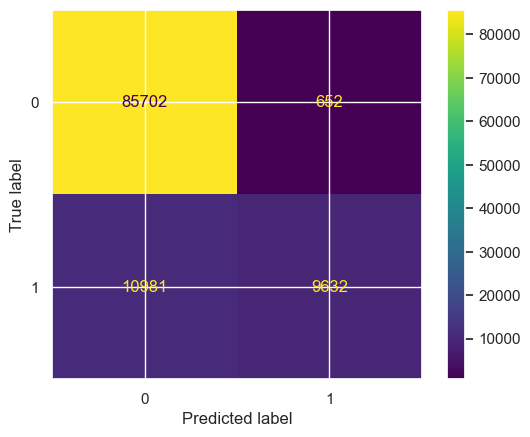

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [86]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)


True Negative:  85702
False Positive:  652
False Negative:  10981
True Positive:  9632


In [87]:
accuracy = np.round(np.diag(conf_matrix).sum() / conf_matrix.sum(),3)
accuracy

0.891

In [88]:
precision = precision_score(y_test, y_pred)
np.round(precision, 3)

0.937

In [89]:
recall = recall_score(y_test, y_pred)
np.round(recall, 3)

0.467

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     86354
           1       0.94      0.47      0.62     20613

    accuracy                           0.89    106967
   macro avg       0.91      0.73      0.78    106967
weighted avg       0.90      0.89      0.88    106967



In [91]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)

f1_score = 2*precision*recall/(precision + recall)
print('F1 score:',f1_score)

Precision: 0.9366005445352004
Recall: 0.467277931402513
F1 score: 0.6234909538142862


In [92]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.7298638076309876

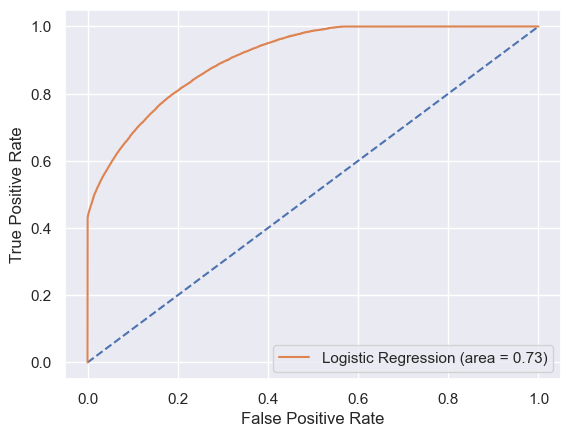

In [93]:
dumbModelProb = [0 for _ in range(len(y_test))]
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
ns_fpr, ns_tpr,thresholds = roc_curve(y_test, dumbModelProb)
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [94]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logisticRegr.predict_proba(X_test)[:,1]) 
from sklearn.metrics import auc
auc = auc(recalls, precisions)
auc

0.7782812892049384

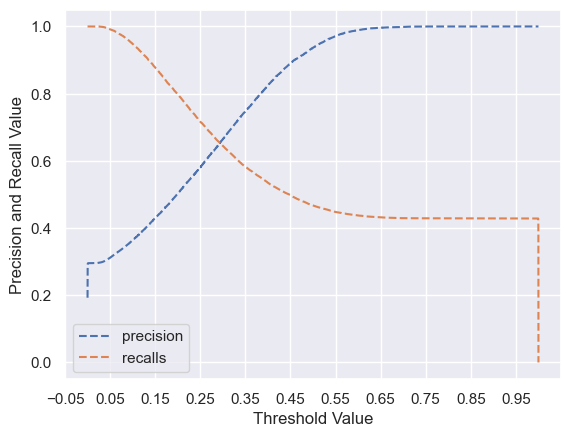

In [95]:
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], linestyle = '--', label='recalls')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))  
plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
plt.legend()
plt.show()

#### Multicollinearity check using Variance Inflation Factor

In [96]:
def vif(X):    
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [97]:
vif(X)[:5]

Feature     VIF
40  application_type_INDIVIDUAL  153.17
2                      int_rate  123.55
34   purpose_debt_consolidation   50.96
33          purpose_credit_card   18.49
5                      open_acc   13.90

In [98]:
X.drop('application_type_INDIVIDUAL', axis=1, inplace=True)
vif(X)[:5]

Feature    VIF
2                     int_rate  99.29
34  purpose_debt_consolidation  27.89
5                     open_acc  13.78
9                    total_acc  12.32
33         purpose_credit_card  10.27

In [99]:
X.drop('int_rate', axis=1, inplace=True)
vif(X)[:5]

Feature    VIF
33  purpose_debt_consolidation  21.43
4                     open_acc  13.68
8                    total_acc  12.32
7                   revol_util   9.01
2                   annual_inc   8.16

In [100]:
X.drop('purpose_debt_consolidation', axis=1, inplace=True)
vif(X)[:5]

Feature    VIF
4    open_acc  13.25
8   total_acc  12.30
7  revol_util   8.43
2  annual_inc   7.97
3         dti   7.79

In [101]:
X.drop('open_acc', axis=1, inplace=True)
vif(X)[:5]

Feature   VIF
6  revol_util  8.09
7   total_acc  7.97
2  annual_inc  7.91
3         dti  7.30
0   loan_amnt  7.20

In [102]:
X.drop('revol_util', axis=1, inplace=True)
vif(X)[:5]

Feature   VIF
2  annual_inc  7.80
6   total_acc  7.74
0   loan_amnt  7.18
3         dti  7.06
4     pub_rec  4.85

In [103]:
X.drop('annual_inc', axis=1, inplace=True)
vif(X)[:5]

Feature   VIF
5             total_acc  7.17
2                   dti  6.45
0             loan_amnt  6.23
3               pub_rec  4.84
7  pub_rec_bankruptcies  4.63

In [104]:
X.drop('total_acc', axis=1, inplace=True)
vif(X)[:5]

Feature   VIF
0              loan_amnt  6.09
2                    dti  5.89
3                pub_rec  4.84
6   pub_rec_bankruptcies  4.63
22       emp_length_10.0  4.01

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logisticRegr = LogisticRegression(max_iter= 500)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy = (logisticRegr.score(X_test, y_test))

In [106]:
print('Accuracy of Logistic Regression model on test data Afer Removing features with high multicollinearity: {:.4f}'.format(accuracy))

Accuracy of Logistic Regression model on test data Afer Removing features with high multicollinearity: 0.8911


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     86354
           1       0.94      0.46      0.62     20613

    accuracy                           0.89    106967
   macro avg       0.91      0.73      0.78    106967
weighted avg       0.90      0.89      0.88    106967



### Oversampling using SMOTE

In [108]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [109]:
X_sm.shape

(402980, 45)

In [110]:
y_sm.shape

(402980,)

In [111]:
y_sm.value_counts()

1    201490
0    201490
Name: loan_status, dtype: int64

In [112]:
logisticRegr = LogisticRegression(max_iter= 500)
logisticRegr.fit(X_sm, y_sm)

LogisticRegression(max_iter=500)

In [113]:
y_pred = logisticRegr.predict(X_test)
accuracy = (logisticRegr.score(X_test, y_test))
print('Accuracy of Logistic Regression model on test data after resampling using SMOTE is: {:.4f}'.format(accuracy))

Accuracy of Logistic Regression model on test data after resampling using SMOTE is: 0.7977


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     86354
           1       0.49      0.81      0.61     20613

    accuracy                           0.80    106967
   macro avg       0.72      0.80      0.74    106967
weighted avg       0.86      0.80      0.81    106967



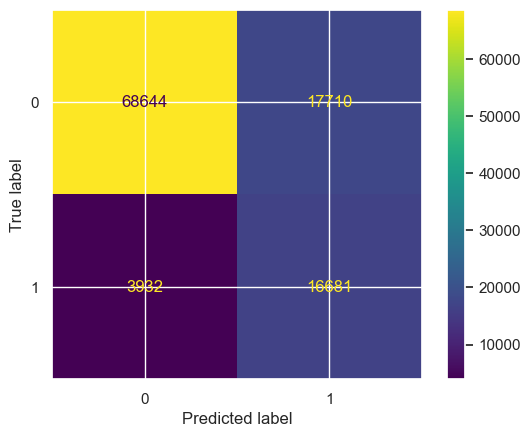

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [116]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)

f1_score = 2*precision*recall/(precision + recall)
print('F1 score:',f1_score)

Precision: 0.48503969061673113
Recall: 0.8092465919565323
F1 score: 0.6065377063486291


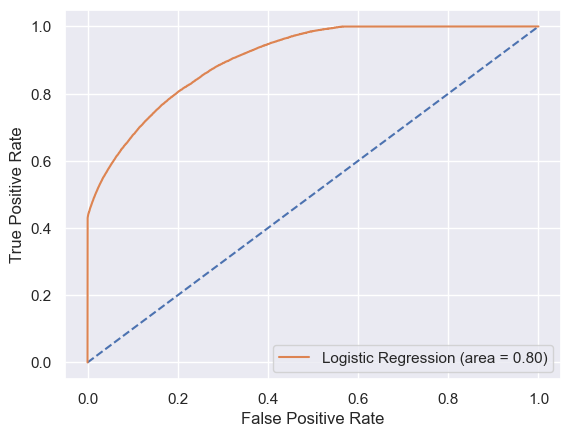

In [117]:
dumbModelProb = [0 for _ in range(len(y_test))]
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
ns_fpr, ns_tpr,thresholds = roc_curve(y_test, dumbModelProb)
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The higher the area under the ROC curve better the classifier AUC score increased from 0.72 to 0.80 which can be we now consider as fair.

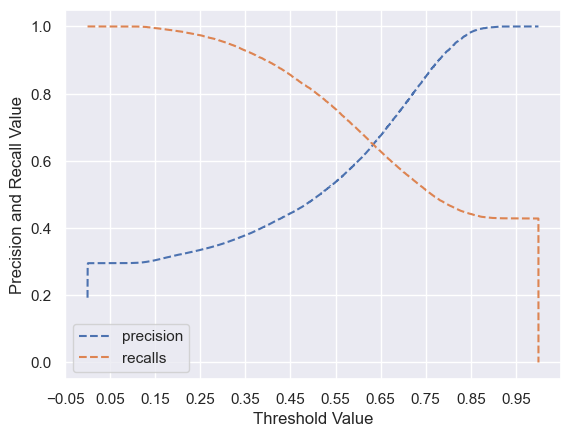

In [118]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], linestyle = '--', label='recalls')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
plt.legend()
plt.show()


# Tradeoff Questions

### 1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

In order to get less False postives and detect real deafaulters, In case of low recall and high precision, consumer finance company might lose money as well as the customers due to strict rule and conservative approach. It would be better to have a low precision and high recall in our case with little risk as we don't want to lose customers and would be a good idea to alarm the company and provide loan at high interest rates even if there is a slight doubt about defaulter.It is important to have a balance between recall and precision, so a good F1-score will make sure that
balance is maintained.
As we have seen in our first model, by keeping precion score higher and then assigning priority to f1 score and then recall, we can make sure that real dafualters (TP) and low False positives (FP) in demominator of Precision. This is important as we can lose out on an opportunity to finance more
supply chains and earn interest in it.


### 2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
Yes. LoanTap should not disburse loans to everyone. Company’s internal policy and analysis should be in place to identify the correct persons. Any asset or Customer who took loan which stops giving returns to its organization for a specified period of time is known as Non-Performing Asset (NPA).
In this case, it can be okay to have slightly low precision i.e., Misclassifying a customer who fully paid loan as charged off, but high recall will play key role here, We should decrease False Negative values in order to get high recall. Disbursing loans to anyone can result into fiannacial losses to the organization and which will eventually worsen the market situation for the organization.
In this case priority would be minimizing gap between precision and recall with maximizinng AUC. Because having less precision would also result into Customer attrition who can fully pay loans if we consider them as NPA, which will eventually lead into Financial losses.
Company should improvise Technology and data analytics to identify the early warning signals that person would be deafualter.

The higher the precision the less likely it is to recruit defaulters, but the potential client pool becomes smaller. The higher the recall, the larger the potential pool of clients but the higher the risk recruiting defaulters. The balance of our recall and precision levels is a matter of risk appetite

# Questionnaire 

### 1.	What percentage of customers have fully paid their Loan Amount?
Around 80.3871% Customers fully paid their loan amount and remaining are charged off.


### 2.	Comment about the correlation between Loan Amount and Instalment features.
Correlation coefficient between two features Loan Amount and Instalment is very high. Correlation coefficient between these two features is 0.97 which indicates these to features are dependent on each other which is indicative of multicollinearity. We can drop any one feature between these two. So dropped Instalments feature


### 3.	The majority of people have home ownership as _______.
The majority people have home ownership as MORTGAGE. Around 50 Percent of customers have MORTAGE type home ownership. And around 40.35% customers have home ownership as rent


### 4.	People with grades ‘A’ are more likely to fully pay their loan. (T/F).
True People with grades ‘A’ are more likely to fully pay their loan.
Even though Only 16% Customers belongs to A grade took loan but 94% Customers among them fully paid their loan which is highest as compared to other grades. 29% and 27% Customers belongs to grade B and Grade C respectively But only 87% and 78% fully paid their loans for B and C grade respectively.



### 5.	Name the top 2 afforded job titles.
1. Manager - Around 1.5 % Customers are managers
2. Teacher - Around 1.4 % Customers are Teachers


### 6.	Thinking from a bank's perspective, which metric should our primary focus be on. 1. ROC AUC 2. Precision 3. Recall 4. F1 Score
1. In our case as we bank would not like to lose money as well as     customers, Precision and Recall both plays an important role. 
2. Precision is more important Missing out to identify/classify a good customer eligible for the loan is okay (low recall), but approving a loan to a bad customer (false positive) who may never repay it is undesirable.
3. A low recall or precision (one or both inputs) makes the F1-score more sensitive, which is great if you want to balance the two. The higher the F1- score the better the model
4. If we think in terms of not losing money in bad loans, Recall is the parameter which should be more focused. f we think in terms of not losing customers at the cost of losing some money in bad loans, Precision should be the main parameter that we should focus as in model 1.
5. In order to conclude, since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone. And hence model 2 is the best model which is having highest Recall.
6. But we have to provide a balanced stance, then F1 score is the metric as it considers both Precision and Recall (harmonically).


### 7.	How does the gap in precision and recall affect the bank?
1. When predicting whether or not a loan will default - it would be better to have a high recall because the banks don't want to lose money, so it would be a good idea to alert the bank even if there is a slight doubt about the borrower. Low precision in this case,] might be okay.
2. When a bank wants to grow faster and get more customers at the expense of losing some money in some cases. In this case, it would be ok to have a slightly higher precision compare the recall.
3. If it is important that the defaulters be predicted with better accuracy we should concentrate on recall. If customer base is important, we will disburse loan more liberally increase precision.

The gap in precision and recall affects the banks when if more difference in precision and recall, more are the chances of banks losing money in form of bad loans. In Model 2 we are getting less precision score than the recall score whereas in other model the difference between Precision and Recall is around 50 % (Precision being the highest and recall being in range of 40-50 %. This clearly shows that there's a risk of banks giving bad loans to defaulters and thus the NPA of the banks are currently rising.


### 8.	Which were the features that heavily affected the outcome?
Zip Code, Grade, Debt to Income ratio and Term are heavily affected the outcome


### 9.	Will the results be affected by geographical location? (Yes/No)
Yes, results affected by geographical location. We Could see location with zip code 11650, 86630, 93700 are charged off. No people from these areas fully paid their loans. while people wit 05113, 00813 and 29597 fully paid their loans. Without considering geographical locations we were getting around 80% accuracy and after considering zip code accuracy increased to 90%


# Actionable Insights and Recommendations

1. Non paying asset is the rising and main concern for the loantap company, so it is important to think in perspective of not lossing money in loans, False Negative value plays an key role here we should not misclassiffy charged off customers as fully paid, which eventually result in loss of money so We shoul focuas on Recall Parameter. If there are derogatory public records in form of earlier banksruptcies, then also, the company should focus on not giving any loan to such customers/businesses.
2. Moreover, the banks assigning grades and subgrades are also equally important as if the grades are of low gradings such as E,F and G which have around 40-50 % probability of the customers defaulting on the loan taken. The banks should be careful in this perspective as well. LoanTap can increase their market presence in Zipcodes with high full paying ratio and minimize their marketing expenditure in Zipcodes where charging off ratio is high.
3. As we could see location with zip code 11650, 86630, 93700 are charged off, No people from these areas fully paid their loans so organization should reverify customers from these areas before considering them for loan approval. Loantap should reverify thier assests collaterals before giving them loans. 
4. Also we could see that loans took for deb't consolidation have large cahnces of charged off, so loantap should reverify the previous loans history of customer before considering them for loans.
5. Customers with Home ownership as Rent have high posibility of charging off, so banks should verify thier income sources, other assests, collaterals.
6. Individuals with higher income are more likely to pay off their loans. Income range more than 80000 has less chances of charging off.With increase in annual income charged off proportion got decreased. So Loantap should consider Work experience, experience in your industry and personal credit history for customers with income range less than 80000 before giving them loans and verify thier income sources.
7. Loantap can implement Technology and data analytics to identify the early warning signals regarding NPA's. They can develop thier internal skills for credit assessment. and can perform Forensic audits to understand the intent of the borrower.